In [1]:
#standard ds imports
import pandas as pd
import numpy as np
import os

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns



#import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [2]:
import pandas as pd
red = pd.read_csv('https://query.data.world/s/b5kzevnjtzdhjkca2cki3z27jgfl47?dws=00000')

In [3]:
import pandas as pd
white = pd.read_csv('https://query.data.world/s/34hlwmdrmsimbmrzz2ojgtq2wgkvdm?dws=00000')

In [4]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
len(red)

1599

In [7]:
len(white)

4898

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Looking for Nulls

In [10]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Value Counts

In [12]:
for col in red.columns:
    print(red[col].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
7.7     49
6.8     46
7.6     46
8.2     45
7.4     44
7.3     44
7.9     42
8.0     42
8.3     40
6.9     38
6.6     37
8.8     34
8.9     33
9.1     29
6.7     28
8.6     27
8.4     26
8.1     26
9.0     26
9.9     26
6.4     25
8.7     24
10.0    23
9.3     22
10.4    21
6.2     20
8.5     19
10.2    19
6.5     17
9.4     17
9.6     17
6.1     16
9.2     16
9.8     15
6.3     14
9.5     14
5.6     14
10.6    14
11.5    13
6.0     13
11.9    12
10.5    12
11.6    12
10.3    11
10.1    10
10.8    10
10.7    10
11.1     9
5.9      9
9.7      9
10.9     8
11.3     7
12.5     7
12.0     7
5.2      6
5.0      6
11.2     5
11.4     5
5.4      5
12.8     5
12.3     5
5.1      4
5.3      4
12.2     4
12.4     4
12.7     4
5.8      4
12.6     4
13.0     3
11.0     3
13.2     3
13.3     3
11.8     3
11.7     3
13.7     2
5.7      2
15.6     2
15.0     2
12.9     2
15.5     2
12.1     1
4.9      1
15.9     1
4.6      1
14.3     1
14.0     1

## Adding the type column

In [13]:
white['type'] = 'white'

In [14]:
red['type'] = 'red'

## Concating the tables

In [15]:
df = pd.concat([red, white])

In [16]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

## Duplicates

In [17]:

# Search for duplicates in the entire DataFrame (based on all columns)
duplicates = df.duplicated()

# Display the rows that are duplicates
df[duplicates]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
4828            6.4             0.230         0.35           10.30      0.042   
4850            7.0             0.360         0.35            2.50      0.048   
4851            6.4             0.330         0.44            8.90      0.055   
4856            7.1             0.230         0.39           13.70      0.058   
4880            6.6             0.340         0.40            8.10      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality   type  
4      9.400000        5    red  
11    10.500000        5    red  
27     9.500000        5    red  
40    10.500000        5    red  
65    10.900000        5    red  
...         ...      ...    ...  
4828   9.200000        5  white  
4850  11.100000        6  white  
4851   9.600000        5  white  
4856   9.000000        6  white  
4880   9.533333        6  white  

[1177 rows x 13 columns]

In [18]:
df = df[duplicates==False]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
5         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[5320 rows x 13 columns]

In [19]:
df = df.reset_index(drop=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
5315     11.2        6  white  
5316      9.6        5  white  
5317      9.4        6  white  
5318     12.8        7  white  
5319     11.8        6  white  

[5320 rows x 13 columns]

## Summary Statistics

In [20]:
df.shape

(5320, 13)

In [21]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     5.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [22]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [23]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

<Axes: xlabel='quality', ylabel='Count'>

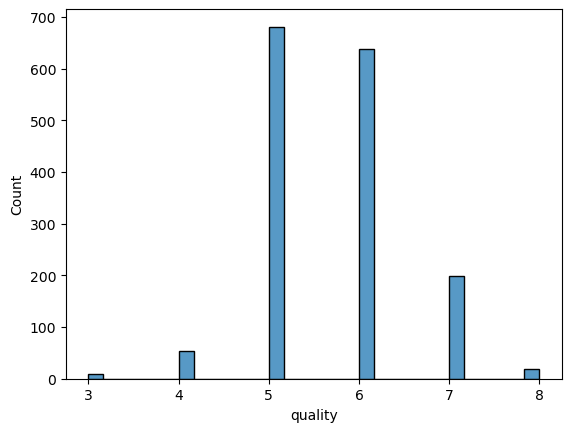

In [24]:
sns.histplot(red.quality)

<Axes: xlabel='quality', ylabel='Count'>

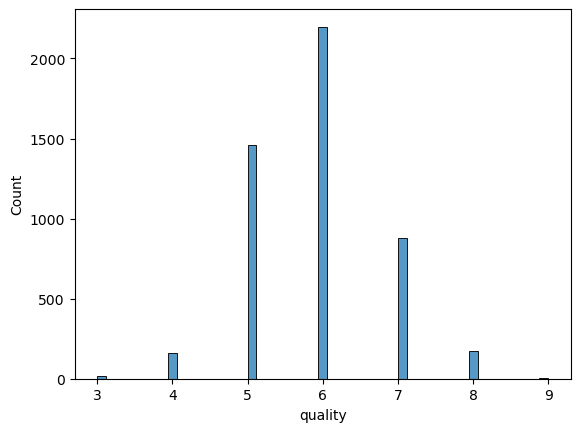

In [25]:
sns.histplot(white.quality)

In [26]:
from scipy.stats import levene

# Assuming you have two sample arrays: sample1 and sample2
statistic, p_value = levene(red.quality, white.quality)
alpha = 0.05  # significance level

print("Levene's Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The variances are equal (fail to reject null hypothesis).")
else:
    print("The variances are not equal (reject null hypothesis).")


Levene's Test:
Statistic: 2.3327077520087762
p-value: 0.1267300410918103
The variances are equal (fail to reject null hypothesis).


In [27]:
import scipy.stats as stats

t, p = stats.ttest_ind(red.quality, white.quality, equal_var=True)
t, p / 2


(-9.685649554187696, 2.444034522100754e-22)

## Spliting Data

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [29]:
df_dummies = pd.get_dummies(df.type, drop_first=True)
# Concatenate the original DataFrame and the dummy variables DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [30]:
df.drop(columns='type', inplace=True, axis=1)

In [31]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  38727
validate observations:  16601
test observations:  13832


In [32]:
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=['quality', 'white'])
    y_train = train['quality']
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=['quality', 'white'])
    y_validate = validate['quality']
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=['quality', 'white'])
    y_test = test['quality']
    

In [33]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(X_train, X_validate, X_test):
    scaler = MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test)

In [34]:
columns = X_train.columns #List of Columns
numbers = [0,1,2,3,4,5,6,7,8,9,10] #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns=zipped)
X_validate_scaled = pd.DataFrame(X_validate_scaled).rename(columns=zipped)
X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns=zipped)

In [35]:
X_train_2_features = X_train_scaled[['density', 'alcohol']]


X_train_3_features = X_train_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]


X_train_4_features = X_train_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]


In [36]:
from sklearn.cluster import KMeans

# creating the clusters for the feature 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_2_features)

kmeans.predict(X_train_2_features)

X_train['2_cluster'] = kmeans.predict(X_train_2_features)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_3_features)

kmeans.predict(X_train_3_features)

X_train['3_cluster'] = kmeans.predict(X_train_3_features)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_4_features)

kmeans.predict(X_train_4_features)
X_train['4_cluster'] = kmeans.predict(X_train_4_features)

In [37]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   
...             ...               ...          ...             ...        ...   
1917            6.1              0.14         0.25             1.3      0.047   
3618            7.4              0.20         0.28             9.1      0.047   
3853            6.8              0.29         0.34             3.5      0.054   
3440            7.4              0.40         0.41            14.1      0.053   
5002            7.3              0.28         0.54            12.9      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   
...                   ...                   ...      ...   ...        ...   
1917                 37.0                 173.0  0.99250  3.35       0.46   
3618                 29.0                  95.0  0.99532  3.16       0.47   
3853                 26.0                 189.0  0.99489  3.42       0.58   
3440                 37.0                 194.0  0.99886  3.20       0.63   
5002                 62.0                 162.5  0.99840  3.06       0.45   

      alcohol  2_cluster  3_cluster  4_cluster  
4080     10.4          1          1          3  
3781     10.7          1          1          3  
933       9.4          0          3          1  
4470      9.7          0          2          2  
1692     10.0          2          1          3  
...       ...        ...        ...        ...  
1917     10.0          2          1          3  
3618      9.8          2          1          2  
3853     10.4          2          1          3  
3440      9.4          0          2          2  
5002      9.1          0          2          2  

[2979 rows x 14 columns]

In [38]:
def cluster_to_dummy(X):  
    
    feat_to_dummy = ['2_cluster', '3_cluster', '4_cluster']
    cluster_dummy_list = []

    for feat in feat_to_dummy:
        # creating a dummy column for the current feature
        df_dummies = pd.get_dummies(X[feat], drop_first=True)

        # Concatenate the original DataFrame and the dummy variables DataFrame
        df = pd.concat([X, df_dummies], axis=1)

        # dropping the original feature
        df.drop(columns=feat_to_dummy, inplace=True)

        cluster_dummy_list.append(df)
        
    return cluster_dummy_list


In [103]:
df1, df2, df3 = cluster_to_dummy(X_train)

In [105]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   

      alcohol  1  2  3  
4080     10.4  1  0  0  
3781     10.7  1  0  0  
933       9.4  0  0  0  
4470      9.7  0  0  0  
1692     10.0  0  1  0

In [106]:
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   

      alcohol  1  2  3  
4080     10.4  1  0  0  
3781     10.7  1  0  0  
933       9.4  0  0  1  
4470      9.7  0  1  0  
1692     10.0  1  0  0

In [107]:
df3.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   

      alcohol  1  2  3  
4080     10.4  0  0  1  
3781     10.7  0  0  1  
933       9.4  1  0  0  
4470      9.7  0  1  0  
1692     10.0  0  0  1

## Univariate Data

### Hist Plot:

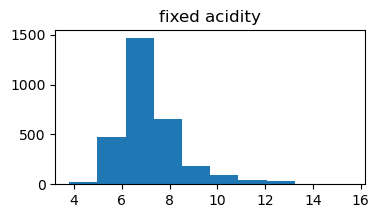

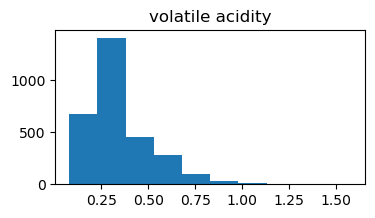

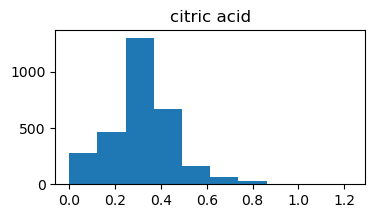

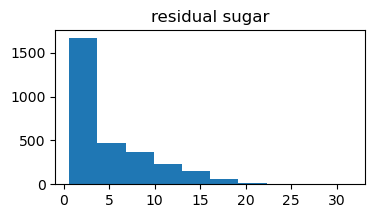

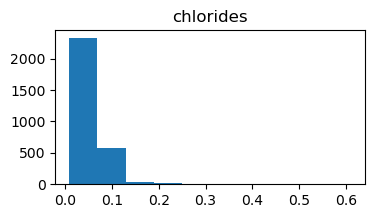

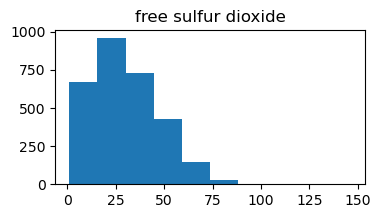

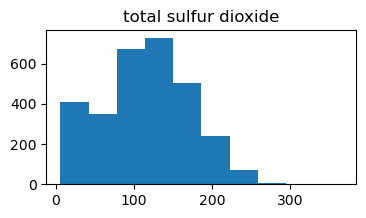

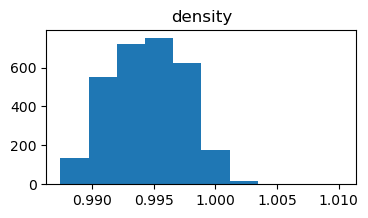

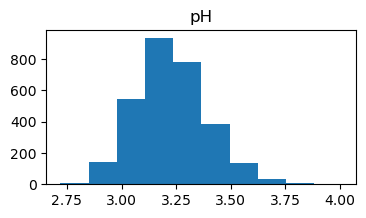

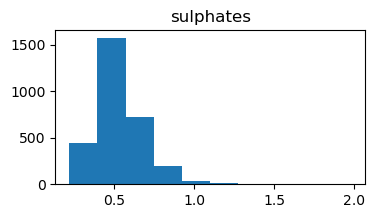

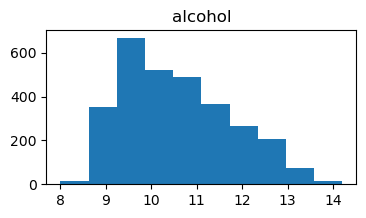

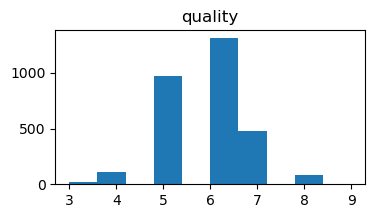

In [39]:
for col in train.drop(columns=['white']).columns:
    column_data = train[col].dropna()
    plt.figure(figsize=(4, 2))
    plt.hist(column_data)
    plt.title(col)
    plt.show()


## Bivariate Data

### Pair Plot:

In [40]:
def plot_variable_pairs(df):
    
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}}, corner="lower")
    plt.show()

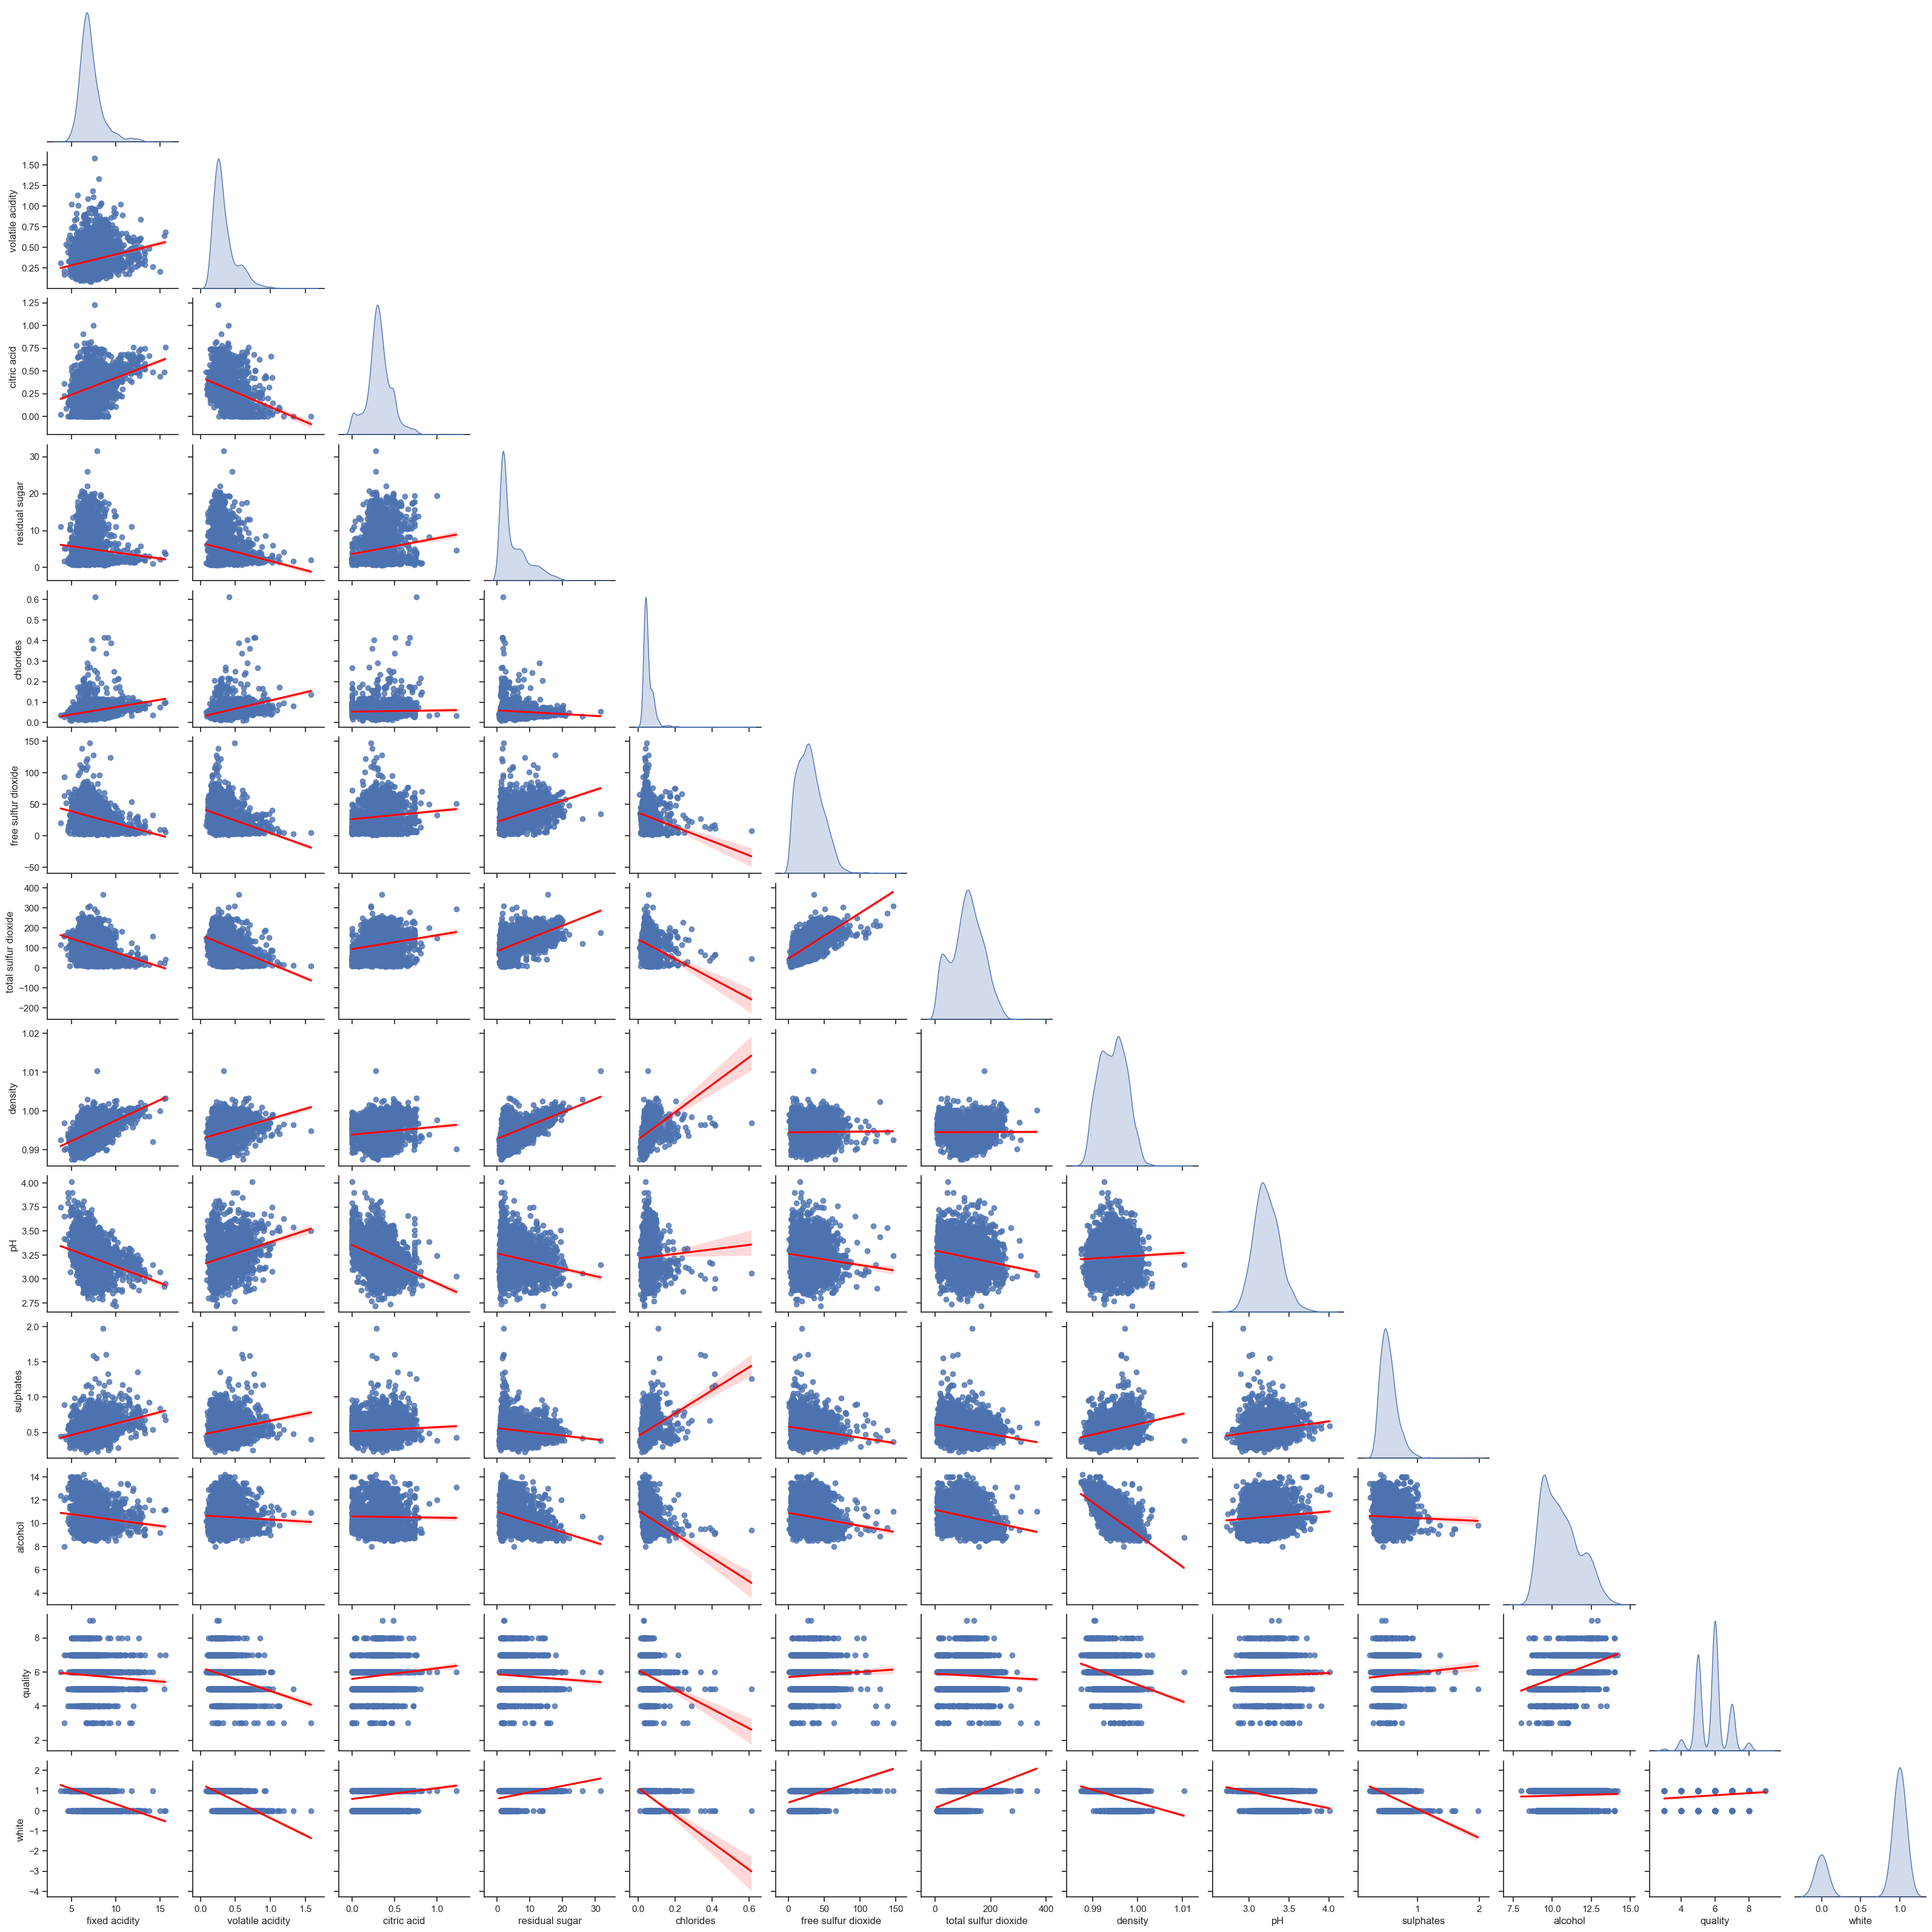

In [41]:
plot_variable_pairs(train)

In [42]:
# separeate discrete from continuous variables
continuous_col = []
categorical_col = []
target = "quality"

for col in train.columns:
    if col == target:
        pass
    elif train[col].dtype == "O":
        categorical_col.append(col)

    else:
        if len(train[col].unique()) < 20: #making anything with less than 4 unique values a catergorical value
            categorical_col.append(col)
        else:
            continuous_col.append(col)
            
categorical_col, continuous_col

(['white'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'])

In [43]:
import itertools


# Get a sample of the categorical columns for ploting
train_continious = train[categorical_col].sample(1000)

# pairs of comninmations
categorical_comb = list(itertools.product(categorical_col, ["quality"]))
categorical_comb

[('white', 'quality')]

WHITE VS QUALITY


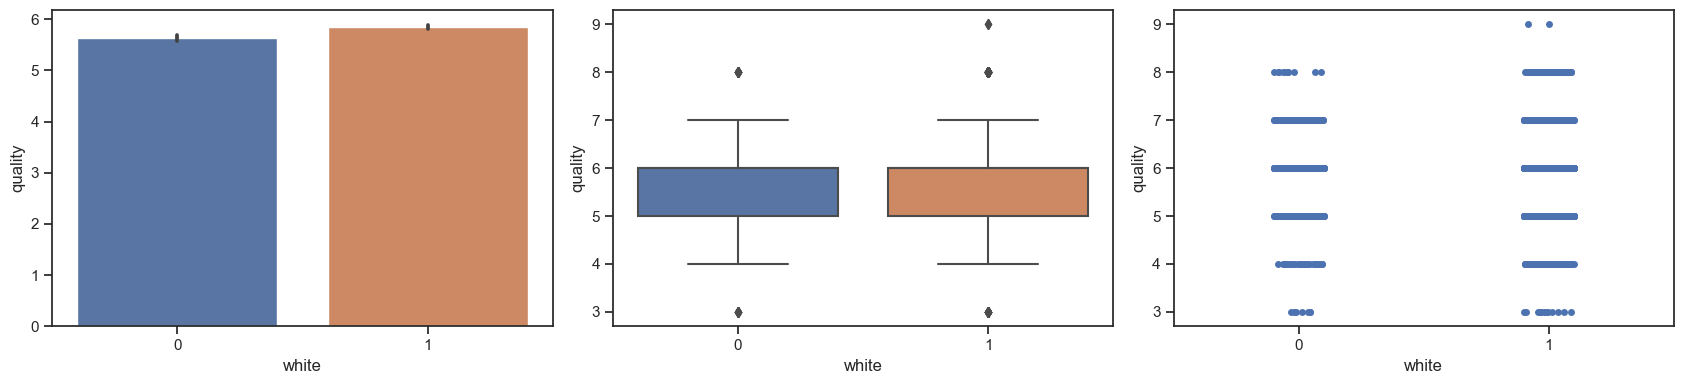

In [44]:
# Get a sample of the continious columns to fro ploting
train_full_sample = train[train.columns].sample(2500)

# plot all the low category columns to see the distributions
for col in categorical_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.barplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.boxplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.stripplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    plt.tight_layout()
    
    # save visual to file path
    # explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()

In [45]:
# Get a sample of the categorical columns for ploting
train_continious = train[continuous_col].sample(2500)

# pairs of comninmations
continuous_comb = list(itertools.product(continuous_col, ["quality"]))
continuous_comb

[('fixed acidity', 'quality'),
 ('volatile acidity', 'quality'),
 ('citric acid', 'quality'),
 ('residual sugar', 'quality'),
 ('chlorides', 'quality'),
 ('free sulfur dioxide', 'quality'),
 ('total sulfur dioxide', 'quality'),
 ('density', 'quality'),
 ('pH', 'quality'),
 ('sulphates', 'quality'),
 ('alcohol', 'quality')]

FIXED ACIDITY VS QUALITY


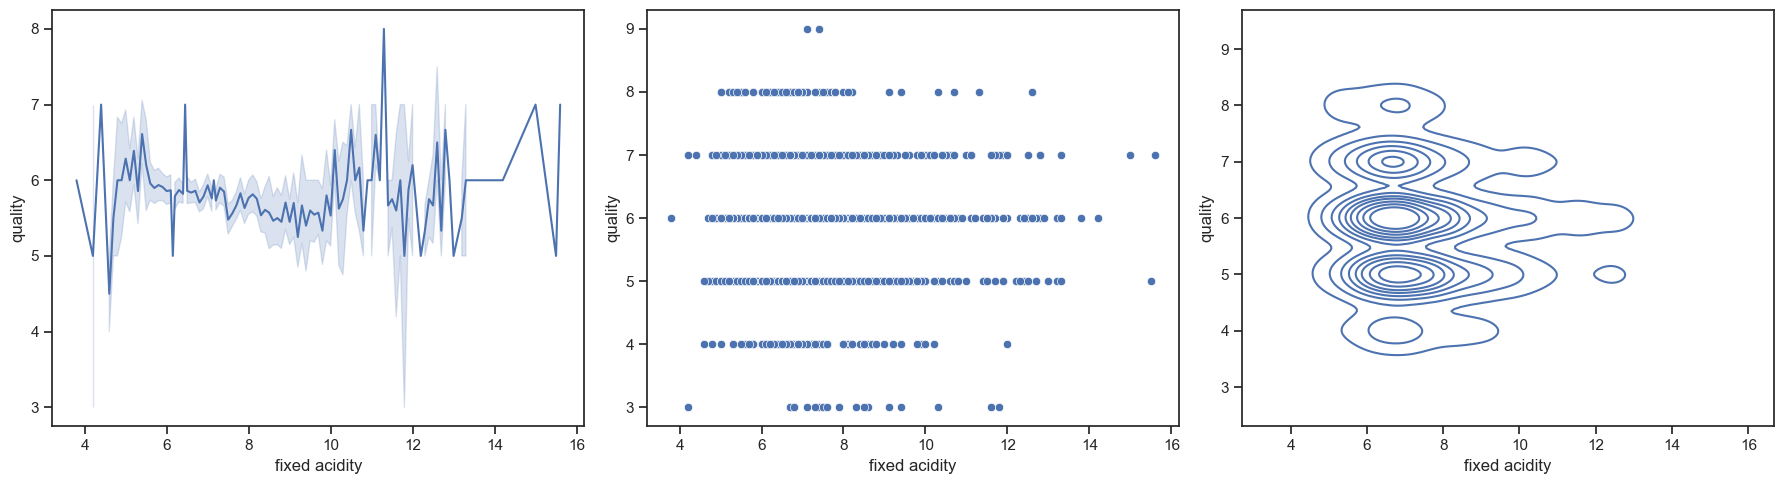

VOLATILE ACIDITY VS QUALITY


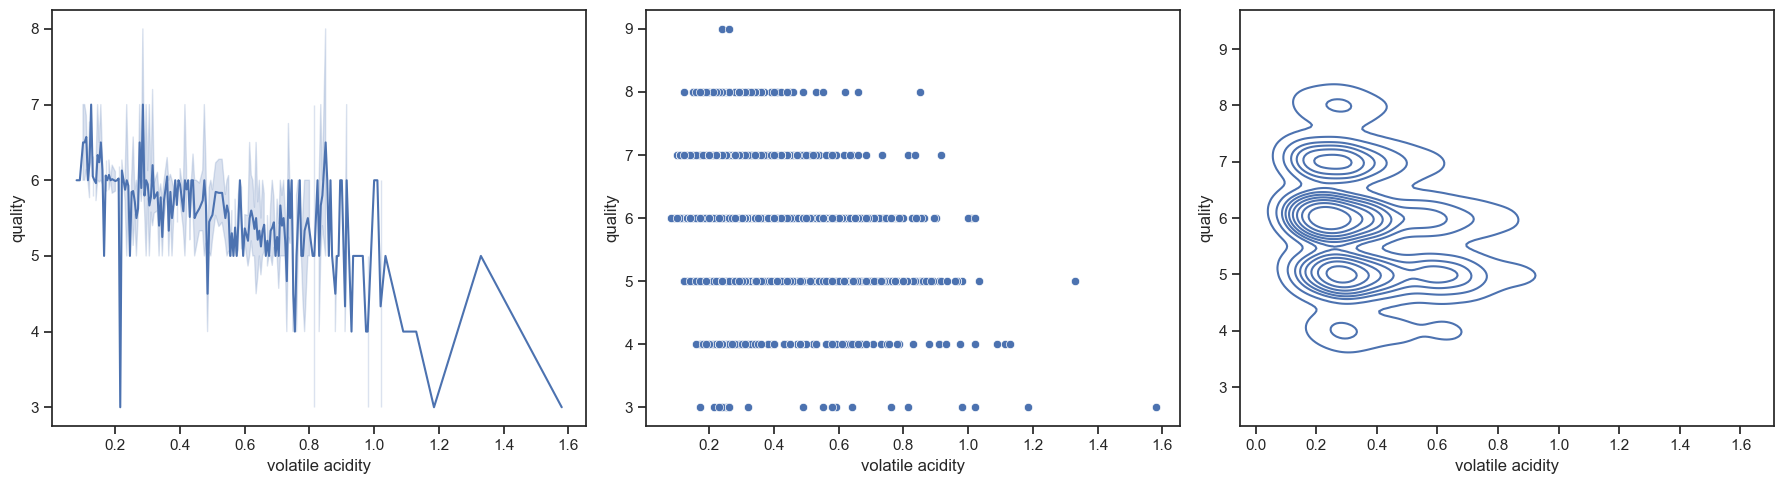

CITRIC ACID VS QUALITY


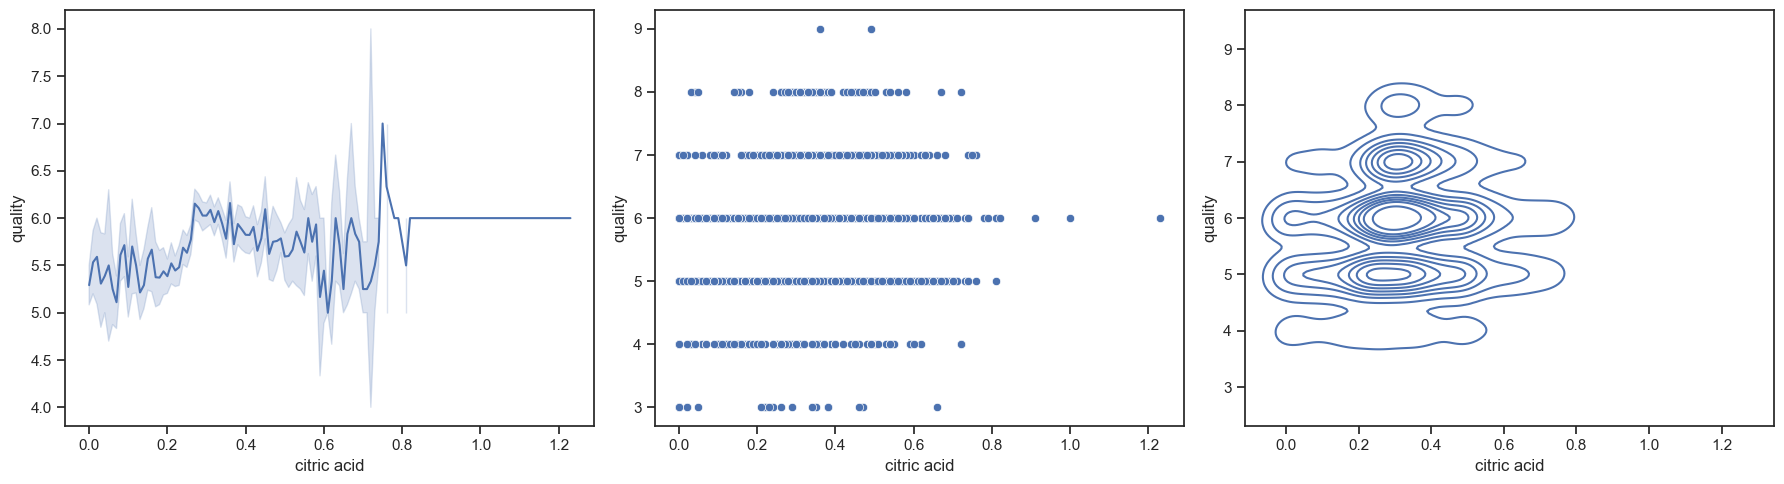

RESIDUAL SUGAR VS QUALITY


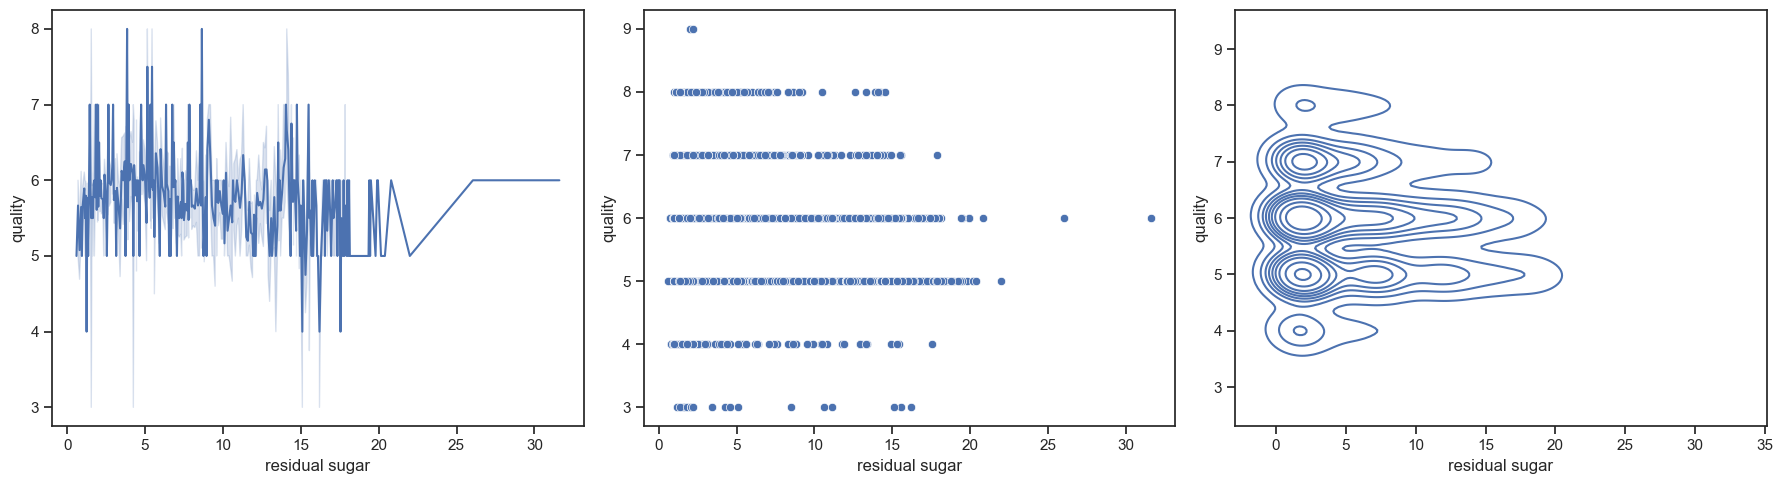

CHLORIDES VS QUALITY


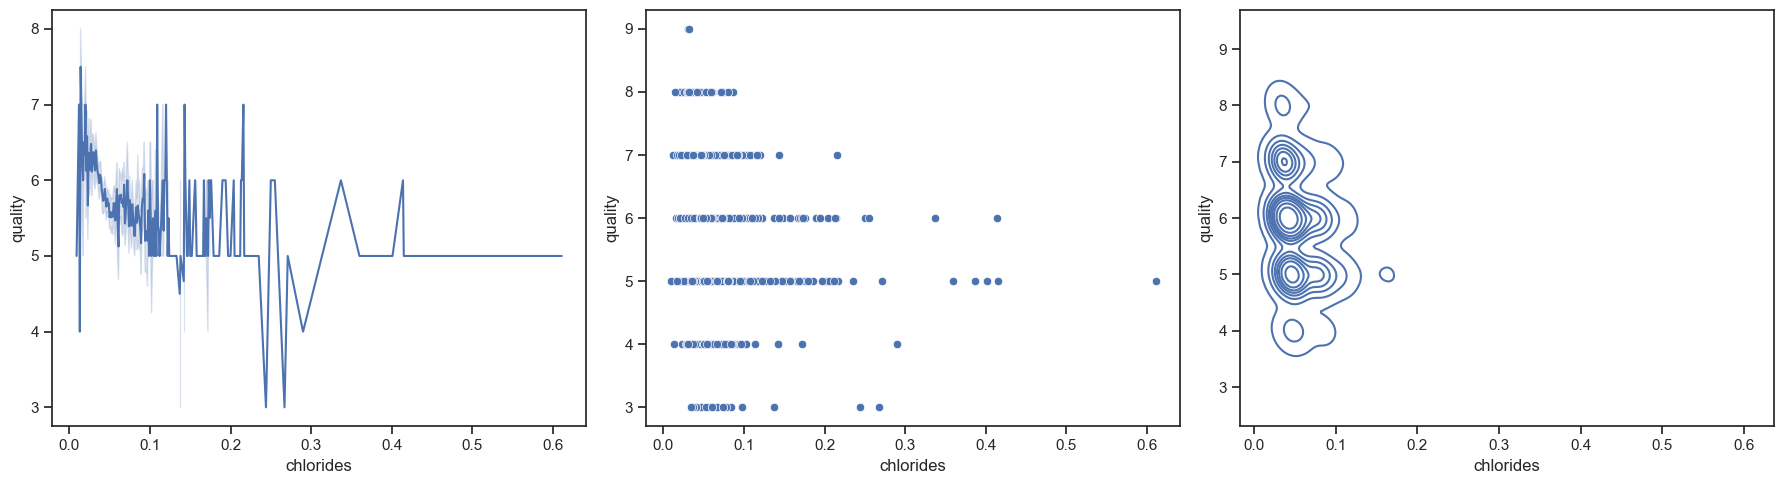

FREE SULFUR DIOXIDE VS QUALITY


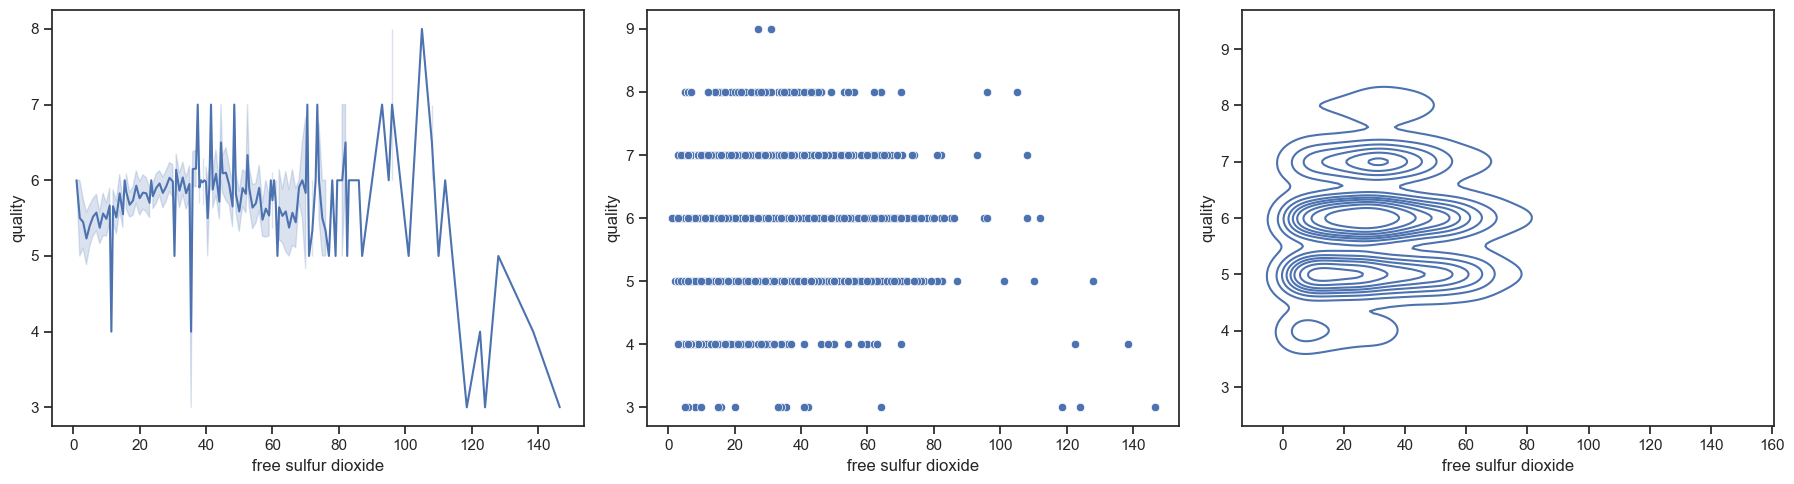

TOTAL SULFUR DIOXIDE VS QUALITY


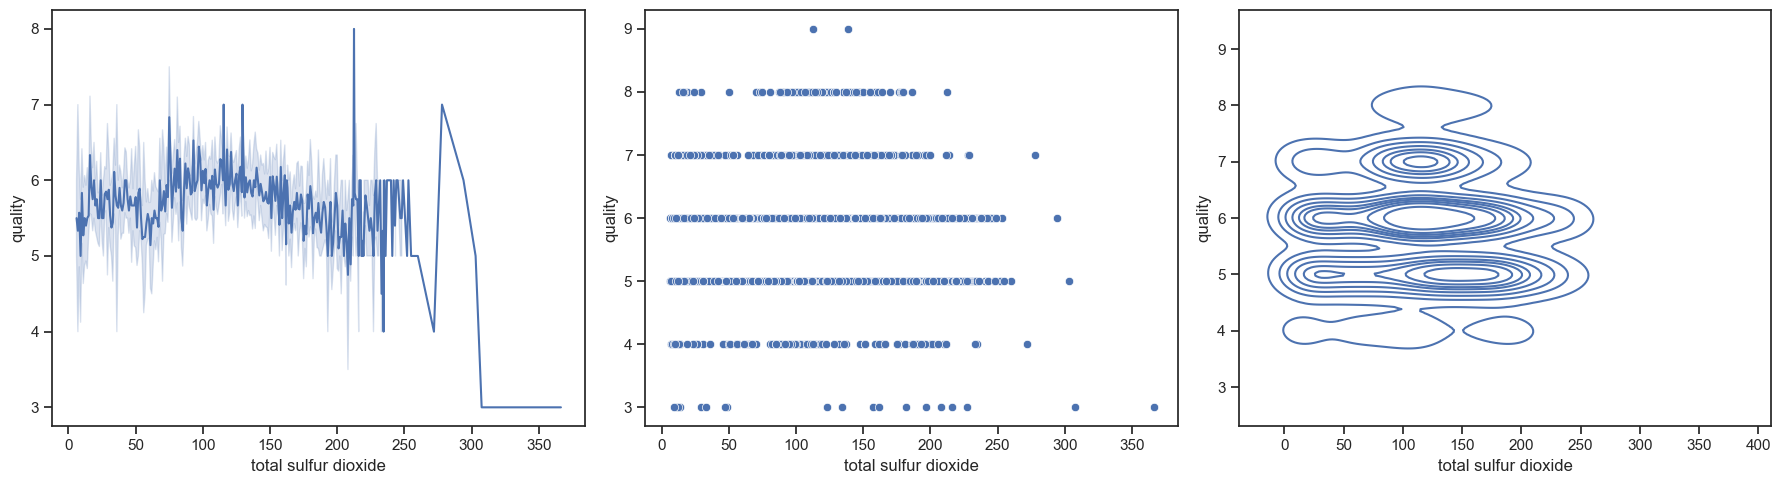

DENSITY VS QUALITY


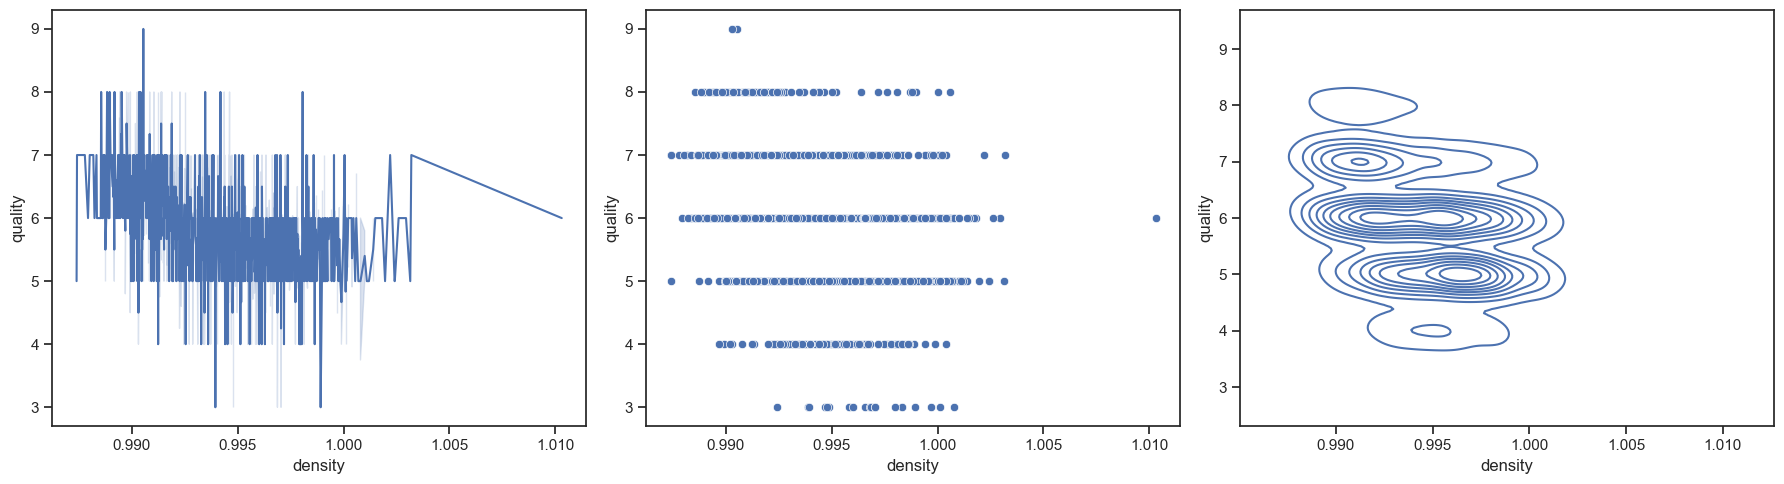

PH VS QUALITY


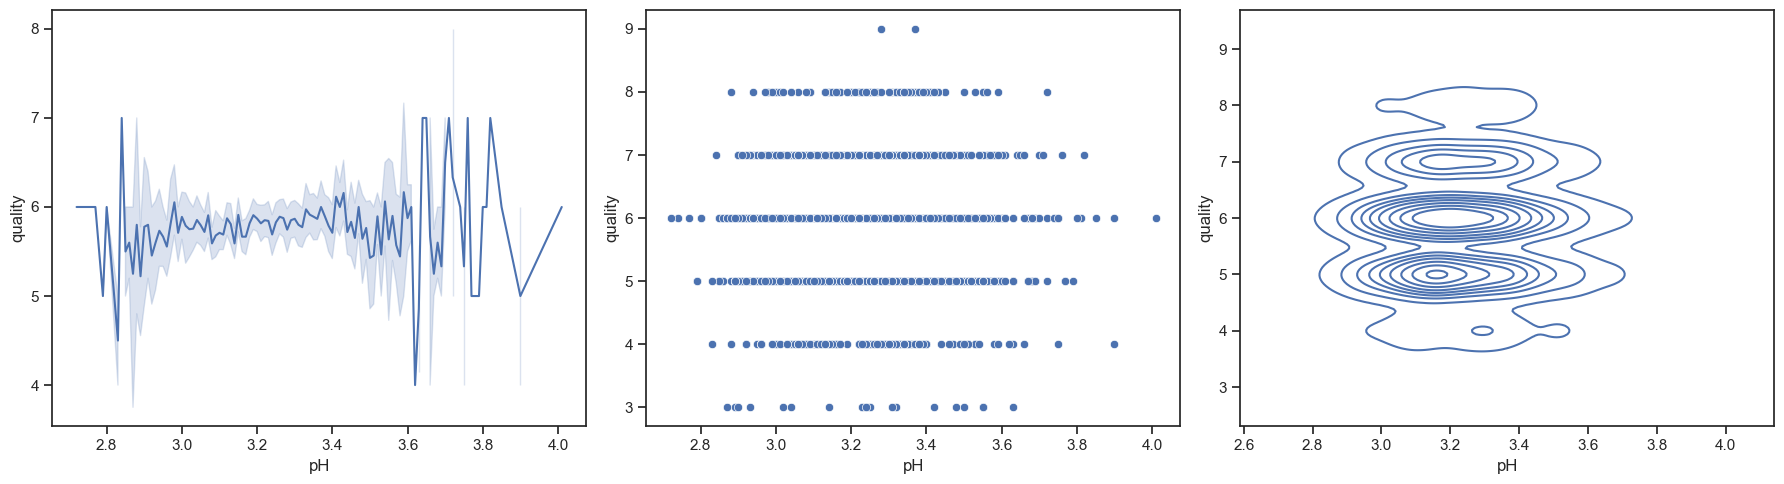

SULPHATES VS QUALITY


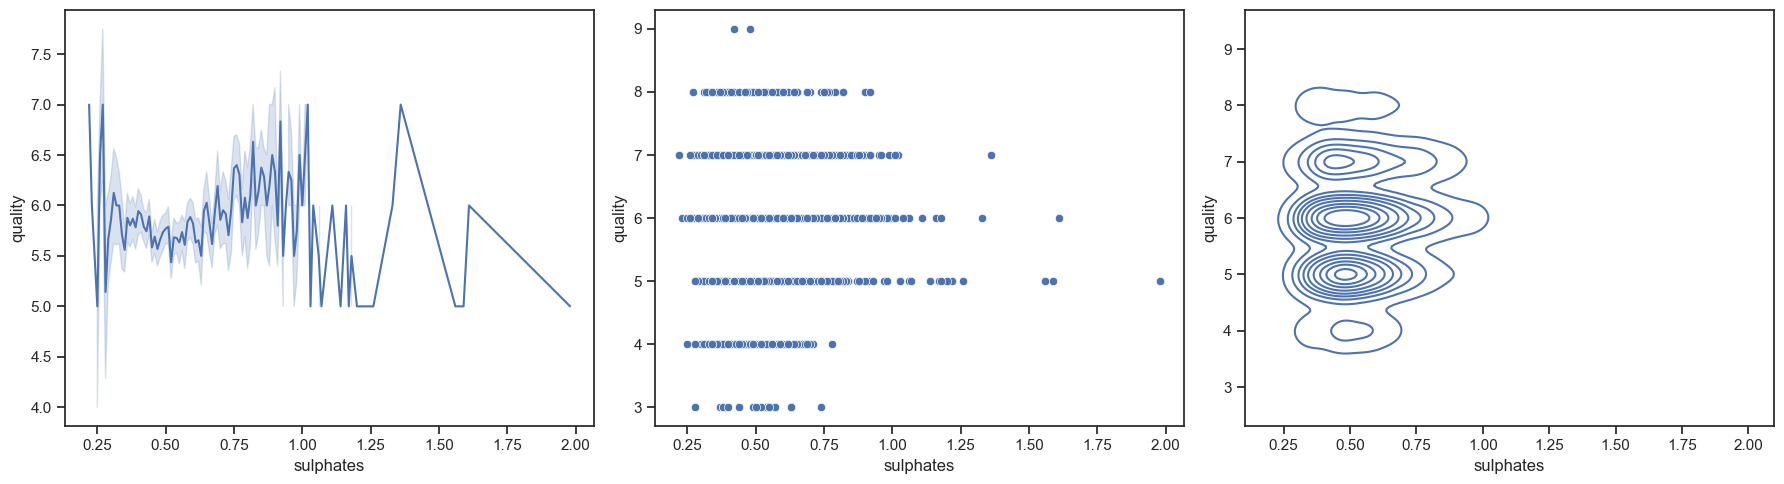

ALCOHOL VS QUALITY


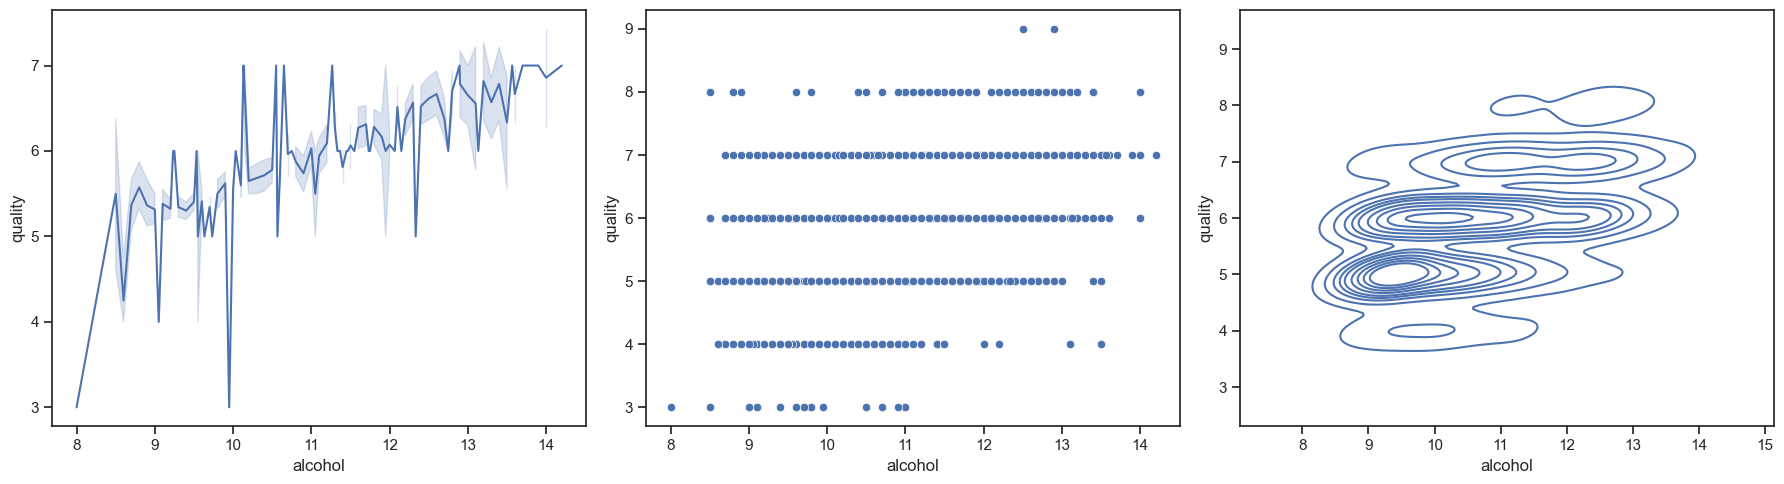

In [46]:
# plot all the low category columns to see the distributions

for col in continuous_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

    sns.lineplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.scatterplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.kdeplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    
    plt.tight_layout()
    
    # save visual to file path
    # explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()

In [47]:
# from itertools import combinations

# # Example list
# col_list = train.drop(columns=['type']).columns

# # Generate all combinations of length 2 from the list
# combinations_list = list(combinations(col_list, 3))

# # Print the result
# print(combinations_list)
# len(combinations_list)

In [48]:
# pd.DataFrame(combinations_list)

In [49]:
# def plot_density(df):
    
#     sns.set(style="ticks")
#     sns.pairplot(df, diag_kind='kde', height=2.5)
#     plt.show()

In [50]:
# plot_density(train)

In [51]:
# # plot all the low category columns to see the distributions

# for col in continuous_comb:
#     print(col[0].upper(), "VS", col[1].upper())
#     # plots
#     fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

#     sns.lineplot(data= train, x=col[0] , y=col[1], ax= ax[0])
#     sns.scatterplot(data= train, x=col[0] , y=col[1], ax= ax[1])
#     sns.kdeplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    
#     plt.tight_layout()
    
#     # save visual to file path
#     explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
#     plt.show()

### Heatmap:

In [52]:
train.pH.min()

2.72

In [53]:
train.pH.max()

4.01

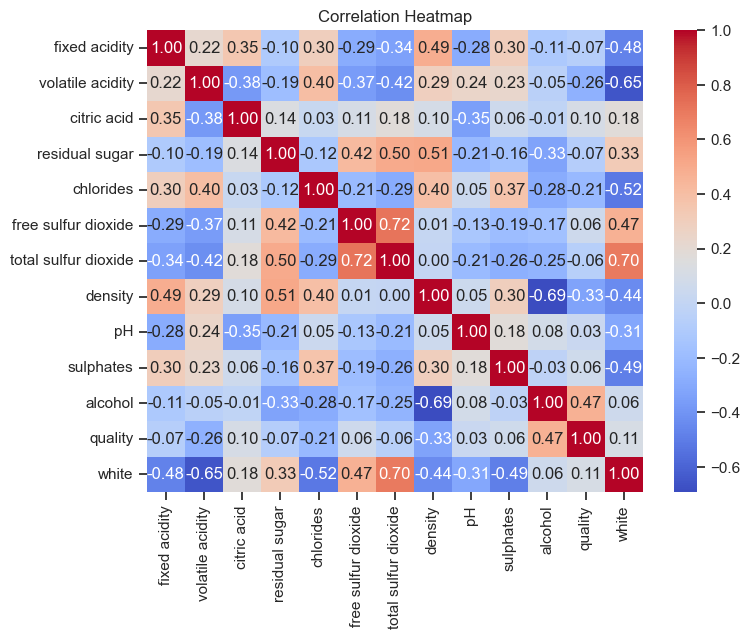

In [54]:
correlation_matrix = train.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

In [55]:
def density_plot(df):  
    for x in range(0, train.columns()):
        
        # Create a density plot using Seaborn for the column 'column_name'
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df, x=df[x], y=df)

        # Set labels and title
        plt.xlabel('X-axis')
        plt.ylabel('Density')
        plt.title('Density Plot')

        # Show the plot
        plt.show()


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

def density_plot(df):
    for col in df.columns:
        # Create a density plot using Seaborn for the column 'col'
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df[col])

        # Set labels and title
        plt.xlabel('X-axis')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col}')

        # Show the plot
        plt.show()



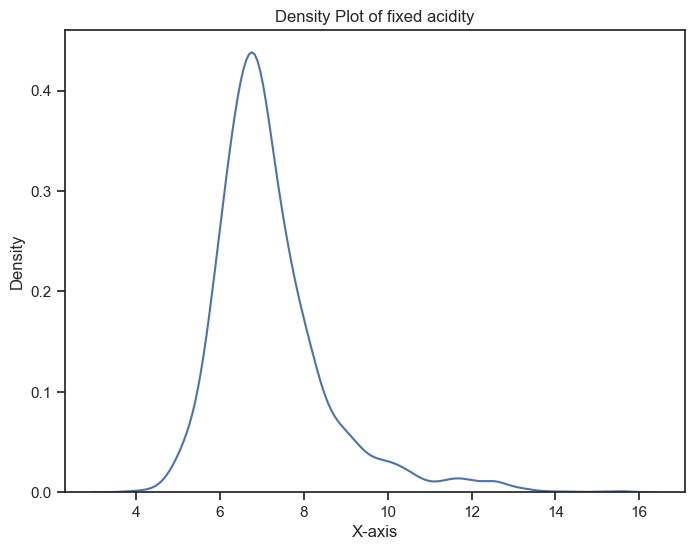

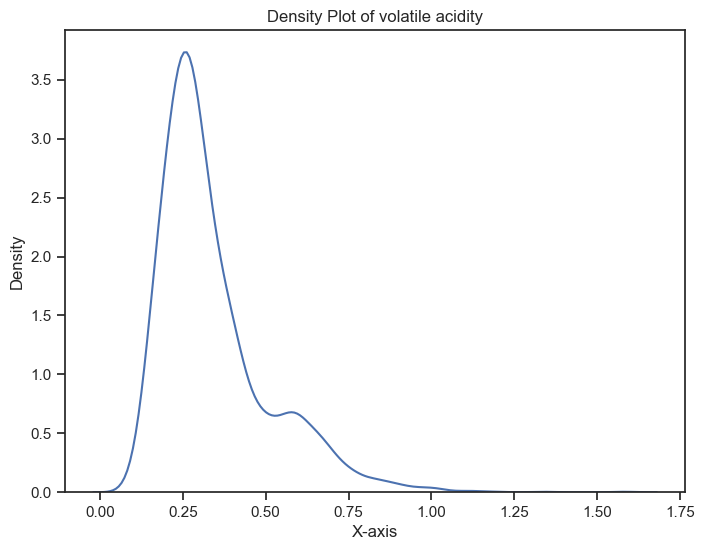

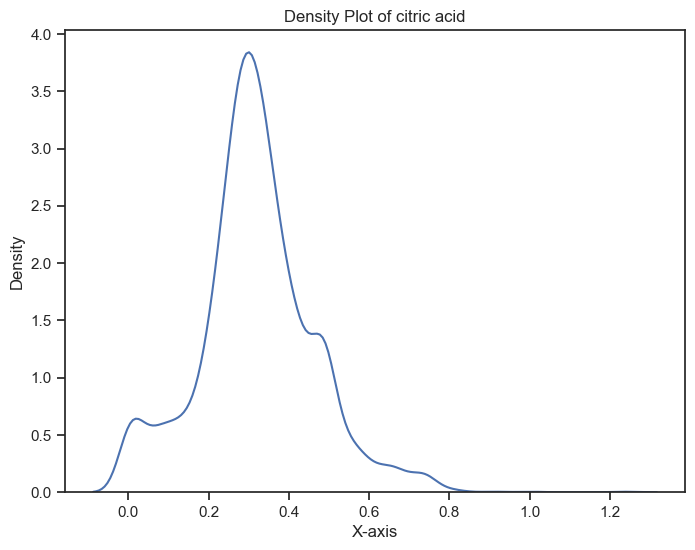

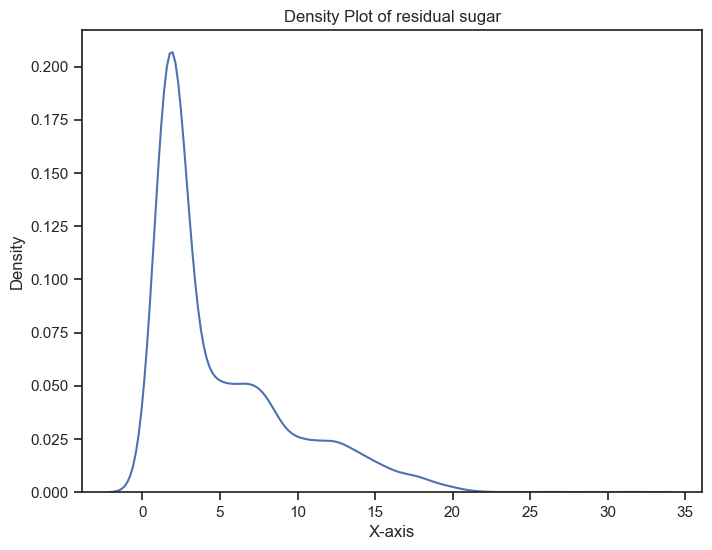

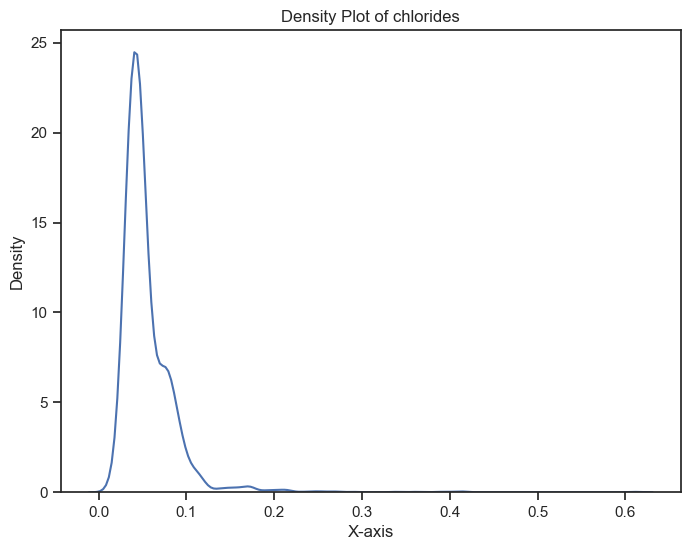

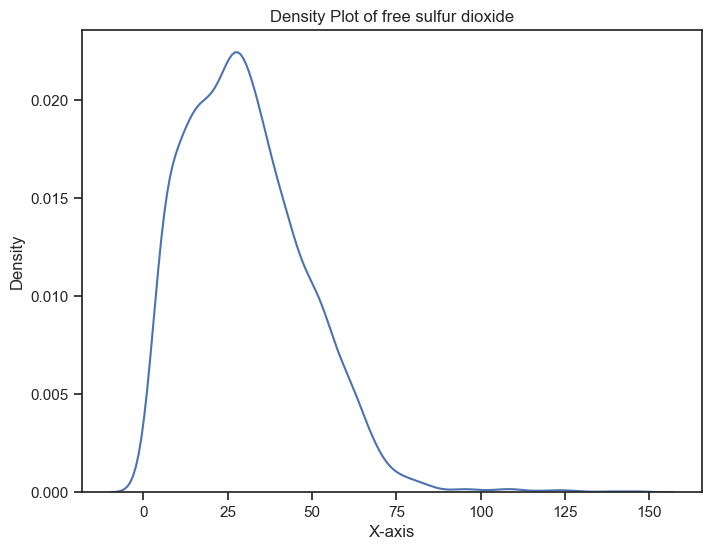

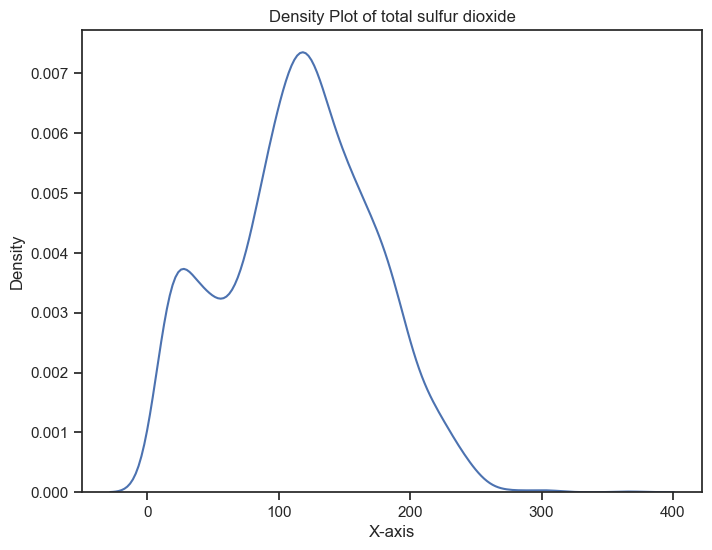

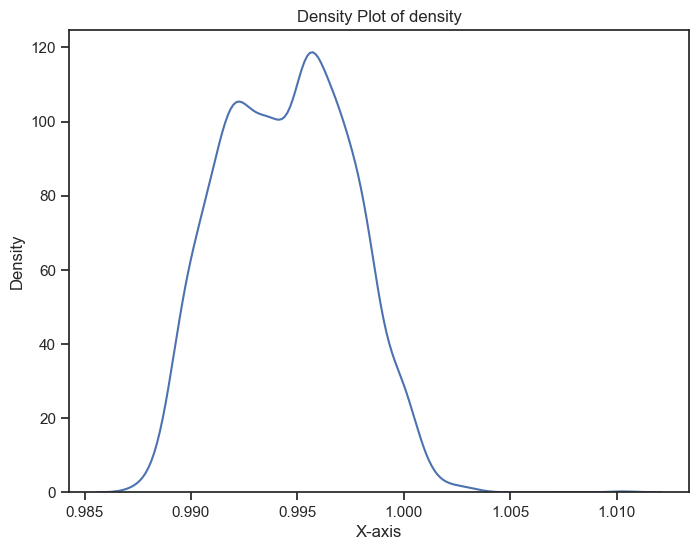

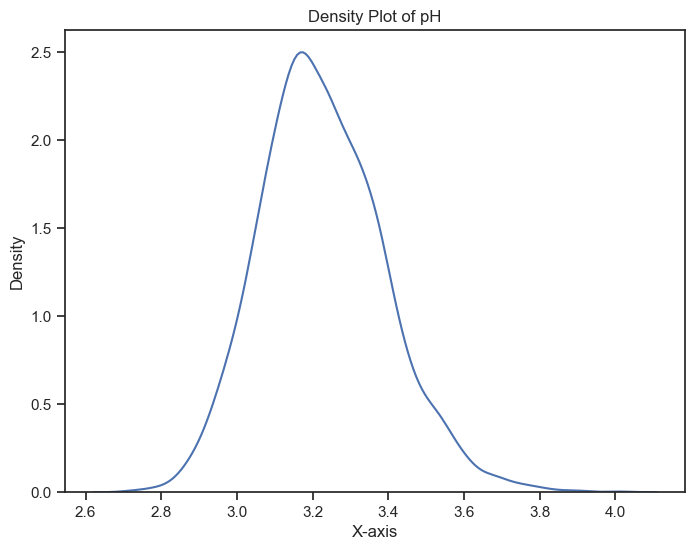

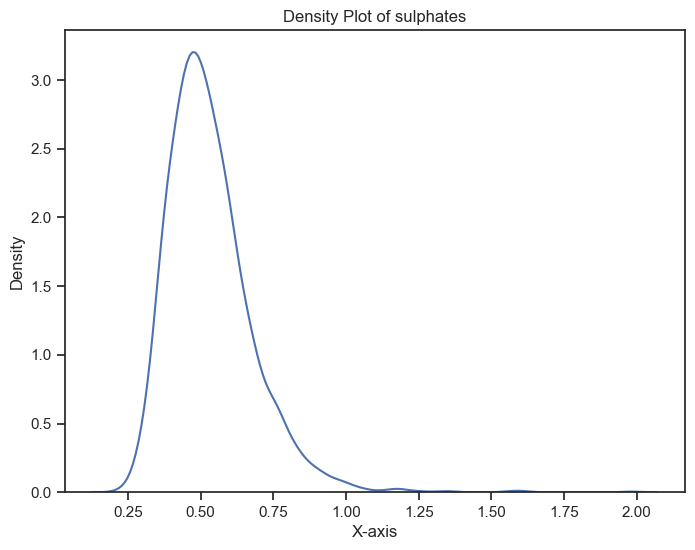

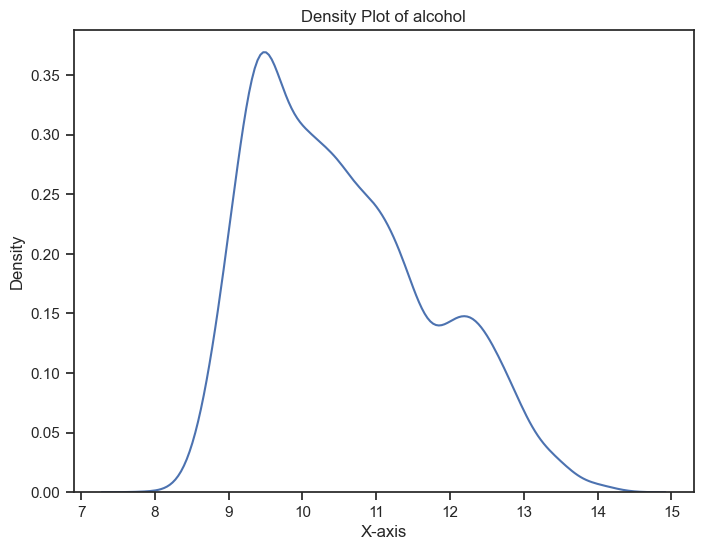

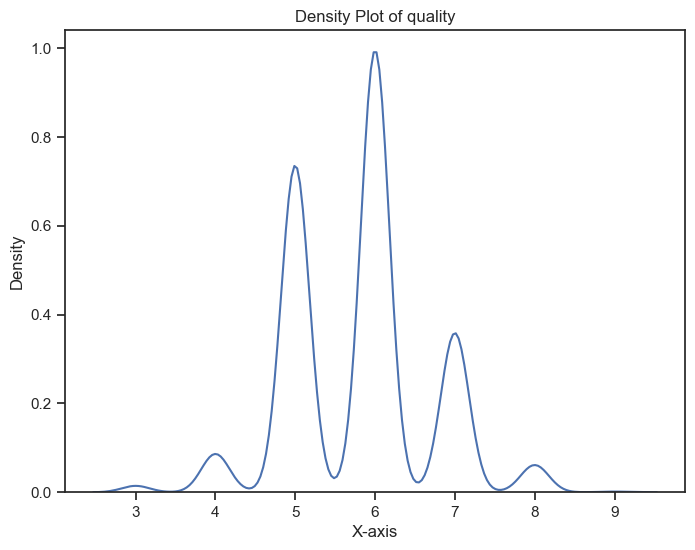

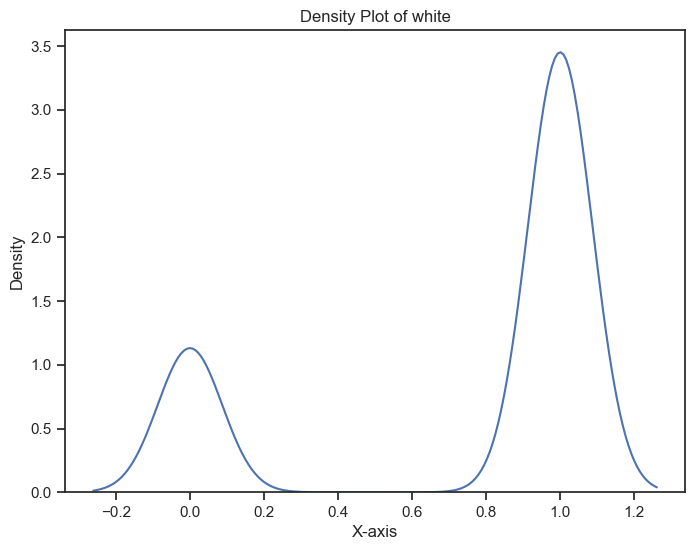

In [57]:
density_plot(train)

## Scaling

In [58]:
to_scale =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'white']

In [59]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [60]:
train_scaled, validate_scaled, test_scaled = scale_data(train, 
               validate, 
               test, 
               to_scale)

In [61]:

train_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080       0.110169          0.086667     0.227642        0.025806   0.063123   
3781       0.279661          0.140000     0.276423        0.232258   0.044850   
933        0.406780          0.293333     0.308943        0.029032   0.144518   
4470       0.271186          0.046667     0.235772        0.509677   0.081395   
1692       0.254237          0.126667     0.097561        0.022581   0.051495   
...             ...               ...          ...             ...        ...   
1917       0.194915          0.040000     0.203252        0.022581   0.063123   
3618       0.305085          0.080000     0.227642        0.274194   0.063123   
3853       0.254237          0.140000     0.276423        0.093548   0.074751   
3440       0.305085          0.213333     0.333333        0.435484   0.073090   
5002       0.296610          0.133333     0.439024        0.396774   0.066445   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4080             0.323024              0.393897  0.186900  0.604651   
3781             0.329897              0.338419  0.286900  0.379845   
933              0.027491              0.033287  0.404367  0.372093   
4470             0.302405              0.288488  0.454148  0.333333   
1692             0.591065              0.449376  0.200873  0.356589   
...                   ...                   ...       ...       ...   
1917             0.247423              0.463245  0.222707  0.488372   
3618             0.192440              0.246879  0.345852  0.341085   
3853             0.171821              0.507628  0.327074  0.542636   
3440             0.247423              0.521498  0.500437  0.372093   
5002             0.419244              0.434119  0.480349  0.263566   

      sulphates   alcohol   quality  white  
4080   0.153409  0.387097  0.333333    1.0  
3781   0.102273  0.435484  0.500000    1.0  
933    0.170455  0.225806  0.333333    0.0  
4470   0.085227  0.274194  0.500000    1.0  
1692   0.107955  0.322581  0.333333    1.0  
...         ...       ...       ...    ...  
1917   0.136364  0.322581  0.500000    1.0  
3618   0.142045  0.290323  0.666667    1.0  
3853   0.204545  0.387097  0.333333    1.0  
3440   0.232955  0.225806  0.500000    1.0  
5002   0.130682  0.177419  0.500000    1.0  

[2979 rows x 13 columns]

In [62]:
columns = train_scaled.columns #List of Columns
numbers = range(0, len(columns)) #List of numbers for the scaled np array I'm converting into a dataframe
zipped= dict(zip(numbers, columns))
X_train_scaled = pd.DataFrame(X_train_scaled).rename(columns=zipped)
X_validate_scaled = pd.DataFrame(X_validate_scaled).rename(columns=zipped)
X_test_scaled = pd.DataFrame(X_test_scaled).rename(columns=zipped)


In [63]:
from itertools import combinations

# Example list
col_list = train.drop(columns=['white']).columns

# Generate all combinations of length 2 from the list
combinations_list = list(combinations(col_list, 3))

# Print the result
# print(combinations_list)
# len(combinations_list)

In [64]:

num_chunks = 15
sublists = np.array_split(combinations_list, num_chunks)
sublists[0]

array([['fixed acidity', 'volatile acidity', 'citric acid'],
       ['fixed acidity', 'volatile acidity', 'residual sugar'],
       ['fixed acidity', 'volatile acidity', 'chlorides'],
       ['fixed acidity', 'volatile acidity', 'free sulfur dioxide'],
       ['fixed acidity', 'volatile acidity', 'total sulfur dioxide'],
       ['fixed acidity', 'volatile acidity', 'density'],
       ['fixed acidity', 'volatile acidity', 'pH'],
       ['fixed acidity', 'volatile acidity', 'sulphates'],
       ['fixed acidity', 'volatile acidity', 'alcohol'],
       ['fixed acidity', 'volatile acidity', 'quality'],
       ['fixed acidity', 'citric acid', 'residual sugar'],
       ['fixed acidity', 'citric acid', 'chlorides'],
       ['fixed acidity', 'citric acid', 'free sulfur dioxide'],
       ['fixed acidity', 'citric acid', 'total sulfur dioxide'],
       ['fixed acidity', 'citric acid', 'density']], dtype='<U20')

In [65]:
train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   
...             ...               ...          ...             ...        ...   
1917            6.1              0.14         0.25             1.3      0.047   
3618            7.4              0.20         0.28             9.1      0.047   
3853            6.8              0.29         0.34             3.5      0.054   
3440            7.4              0.40         0.41            14.1      0.053   
5002            7.3              0.28         0.54            12.9      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   
...                   ...                   ...      ...   ...        ...   
1917                 37.0                 173.0  0.99250  3.35       0.46   
3618                 29.0                  95.0  0.99532  3.16       0.47   
3853                 26.0                 189.0  0.99489  3.42       0.58   
3440                 37.0                 194.0  0.99886  3.20       0.63   
5002                 62.0                 162.5  0.99840  3.06       0.45   

      alcohol  quality  white  
4080     10.4        5      1  
3781     10.7        6      1  
933       9.4        5      0  
4470      9.7        6      1  
1692     10.0        5      1  
...       ...      ...    ...  
1917     10.0        6      1  
3618      9.8        7      1  
3853     10.4        5      1  
3440      9.4        6      1  
5002      9.1        6      1  

[2979 rows x 13 columns]

In [66]:
train_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080       0.110169          0.086667     0.227642        0.025806   0.063123   
3781       0.279661          0.140000     0.276423        0.232258   0.044850   
933        0.406780          0.293333     0.308943        0.029032   0.144518   
4470       0.271186          0.046667     0.235772        0.509677   0.081395   
1692       0.254237          0.126667     0.097561        0.022581   0.051495   
...             ...               ...          ...             ...        ...   
1917       0.194915          0.040000     0.203252        0.022581   0.063123   
3618       0.305085          0.080000     0.227642        0.274194   0.063123   
3853       0.254237          0.140000     0.276423        0.093548   0.074751   
3440       0.305085          0.213333     0.333333        0.435484   0.073090   
5002       0.296610          0.133333     0.439024        0.396774   0.066445   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4080             0.323024              0.393897  0.186900  0.604651   
3781             0.329897              0.338419  0.286900  0.379845   
933              0.027491              0.033287  0.404367  0.372093   
4470             0.302405              0.288488  0.454148  0.333333   
1692             0.591065              0.449376  0.200873  0.356589   
...                   ...                   ...       ...       ...   
1917             0.247423              0.463245  0.222707  0.488372   
3618             0.192440              0.246879  0.345852  0.341085   
3853             0.171821              0.507628  0.327074  0.542636   
3440             0.247423              0.521498  0.500437  0.372093   
5002             0.419244              0.434119  0.480349  0.263566   

      sulphates   alcohol   quality  white  
4080   0.153409  0.387097  0.333333    1.0  
3781   0.102273  0.435484  0.500000    1.0  
933    0.170455  0.225806  0.333333    0.0  
4470   0.085227  0.274194  0.500000    1.0  
1692   0.107955  0.322581  0.333333    1.0  
...         ...       ...       ...    ...  
1917   0.136364  0.322581  0.500000    1.0  
3618   0.142045  0.290323  0.666667    1.0  
3853   0.204545  0.387097  0.333333    1.0  
3440   0.232955  0.225806  0.500000    1.0  
5002   0.130682  0.177419  0.500000    1.0  

[2979 rows x 13 columns]

In [67]:

# from sklearn.cluster import KMeans


# for x,y,z in sublists[0]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x}{y}{z}')

In [68]:

# from sklearn.cluster import KMeans


# for x,y,z in sublists[1]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [69]:

# from sklearn.cluster import KMeans


# for x,y,z in sublists[2]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [70]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[3]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [71]:
X_train_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.110169          0.086667     0.227642        0.025806   0.063123   
1          0.279661          0.140000     0.276423        0.232258   0.044850   
2          0.406780          0.293333     0.308943        0.029032   0.144518   
3          0.271186          0.046667     0.235772        0.509677   0.081395   
4          0.254237          0.126667     0.097561        0.022581   0.051495   
...             ...               ...          ...             ...        ...   
2974       0.194915          0.040000     0.203252        0.022581   0.063123   
2975       0.305085          0.080000     0.227642        0.274194   0.063123   
2976       0.254237          0.140000     0.276423        0.093548   0.074751   
2977       0.305085          0.213333     0.333333        0.435484   0.073090   
2978       0.296610          0.133333     0.439024        0.396774   0.066445   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.323024              0.393897  0.186900  0.604651   
1                0.329897              0.338419  0.286900  0.379845   
2                0.027491              0.033287  0.404367  0.372093   
3                0.302405              0.288488  0.454148  0.333333   
4                0.591065              0.449376  0.200873  0.356589   
...                   ...                   ...       ...       ...   
2974             0.247423              0.463245  0.222707  0.488372   
2975             0.192440              0.246879  0.345852  0.341085   
2976             0.171821              0.507628  0.327074  0.542636   
2977             0.247423              0.521498  0.500437  0.372093   
2978             0.419244              0.434119  0.480349  0.263566   

      sulphates   alcohol  
0      0.153409  0.387097  
1      0.102273  0.435484  
2      0.170455  0.225806  
3      0.085227  0.274194  
4      0.107955  0.322581  
...         ...       ...  
2974   0.136364  0.322581  
2975   0.142045  0.290323  
2976   0.204545  0.387097  
2977   0.232955  0.225806  
2978   0.130682  0.177419  

[2979 rows x 11 columns]

In [72]:
sublists[4]

array([['volatile acidity', 'citric acid', 'pH'],
       ['volatile acidity', 'citric acid', 'sulphates'],
       ['volatile acidity', 'citric acid', 'alcohol'],
       ['volatile acidity', 'citric acid', 'quality'],
       ['volatile acidity', 'residual sugar', 'chlorides'],
       ['volatile acidity', 'residual sugar', 'free sulfur dioxide'],
       ['volatile acidity', 'residual sugar', 'total sulfur dioxide'],
       ['volatile acidity', 'residual sugar', 'density'],
       ['volatile acidity', 'residual sugar', 'pH'],
       ['volatile acidity', 'residual sugar', 'sulphates'],
       ['volatile acidity', 'residual sugar', 'alcohol'],
       ['volatile acidity', 'residual sugar', 'quality'],
       ['volatile acidity', 'chlorides', 'free sulfur dioxide'],
       ['volatile acidity', 'chlorides', 'total sulfur dioxide'],
       ['volatile acidity', 'chlorides', 'density']], dtype='<U20')

In [73]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[4]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [74]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[5]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [75]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[6]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [76]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[7]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [77]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[8]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [78]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[9]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [79]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[10]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [80]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[11]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [81]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[12]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [82]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[13]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [83]:
# from sklearn.cluster import KMeans


# for x,y,z in sublists[14]:
    
    

#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{x} {y} {z}')

In [84]:
from itertools import combinations

# Example list
col_list = train.drop(columns=['white']).columns

# Generate all combinations of length 2 from the list
combinations_list = list(combinations(col_list, 4))

# Print the result
# print(combinations_list)
len(combinations_list)

495

In [85]:
combinations_list

[('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'chlorides'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'density'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'pH'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'sulphates'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'alcohol'),
 ('fixed acidity', 'volatile acidity', 'citric acid', 'quality'),
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides'),
 ('fixed acidity',
  'volatile acidity',
  'residual sugar',
  'free sulfur dioxide'),
 ('fixed acidity',
  'volatile acidity',
  'residual sugar',
  'total sulfur dioxide'),
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'density'),
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'pH

In [86]:
num_chunks = 50
sublists = np.array_split(combinations_list, num_chunks)


In [87]:
# i=0
# while i < 15:

#     for w,x,y,z in sublists[i][]:


#         with plt.style.context('seaborn-whitegrid'):
#             plt.figure(figsize=(9, 6))
#         #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#             pd.Series({k: KMeans(k).fit(train_scaled[[w, x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#             plt.xticks(range(2, 12))
#             plt.xlabel('k')
#             plt.ylabel('inertia')
#             plt.title(f'{w} {x} {y} {z}')
            
#     i+=1

In [88]:
# for w,x,y,z in sublists[0]:


#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#     #     pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(train_scaled[[w, x, y, z]]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         pd.Series({k: KMeans(k).fit(X_train[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     #     pd.Series({k: KMeans(k).fit(X_train[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.yticks(range(40, 180))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f'{w} {x} {y} {z}')

Text(0, 0.5, 'chlorides')

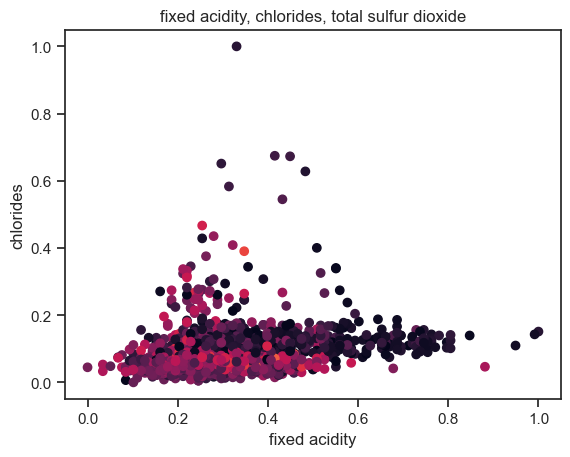

In [89]:
plt.scatter(train_scaled['fixed acidity'], train_scaled['chlorides'], c=train_scaled['total sulfur dioxide'])
plt.title('fixed acidity, chlorides, total sulfur dioxide')
plt.xlabel('fixed acidity')
plt.ylabel('chlorides')

# Explore / Statisitical Hypothesis

## * Density, how does that affect residual sugars

In [90]:
train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4080            5.1              0.21         0.28             1.4      0.047   
3781            7.1              0.29         0.34             7.8      0.036   
933             8.6              0.52         0.38             1.5      0.096   
4470            7.0              0.15         0.29            16.4      0.058   
1692            6.8              0.27         0.12             1.3      0.040   
...             ...               ...          ...             ...        ...   
1917            6.1              0.14         0.25             1.3      0.047   
3618            7.4              0.20         0.28             9.1      0.047   
3853            6.8              0.29         0.34             3.5      0.054   
3440            7.4              0.40         0.41            14.1      0.053   
5002            7.3              0.28         0.54            12.9      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4080                 48.0                 148.0  0.99168  3.50       0.49   
3781                 49.0                 128.0  0.99397  3.21       0.40   
933                   5.0                  18.0  0.99666  3.20       0.52   
4470                 45.0                 110.0  0.99780  3.15       0.37   
1692                 87.0                 168.0  0.99200  3.18       0.41   
...                   ...                   ...      ...   ...        ...   
1917                 37.0                 173.0  0.99250  3.35       0.46   
3618                 29.0                  95.0  0.99532  3.16       0.47   
3853                 26.0                 189.0  0.99489  3.42       0.58   
3440                 37.0                 194.0  0.99886  3.20       0.63   
5002                 62.0                 162.5  0.99840  3.06       0.45   

      alcohol  quality  white  
4080     10.4        5      1  
3781     10.7        6      1  
933       9.4        5      0  
4470      9.7        6      1  
1692     10.0        5      1  
...       ...      ...    ...  
1917     10.0        6      1  
3618      9.8        7      1  
3853     10.4        5      1  
3440      9.4        6      1  
5002      9.1        6      1  

[2979 rows x 13 columns]

In [91]:
red = train[train['white']==0]

In [92]:
white = train[train['white']==1]

## All wines Red and white

density vs residual sugar


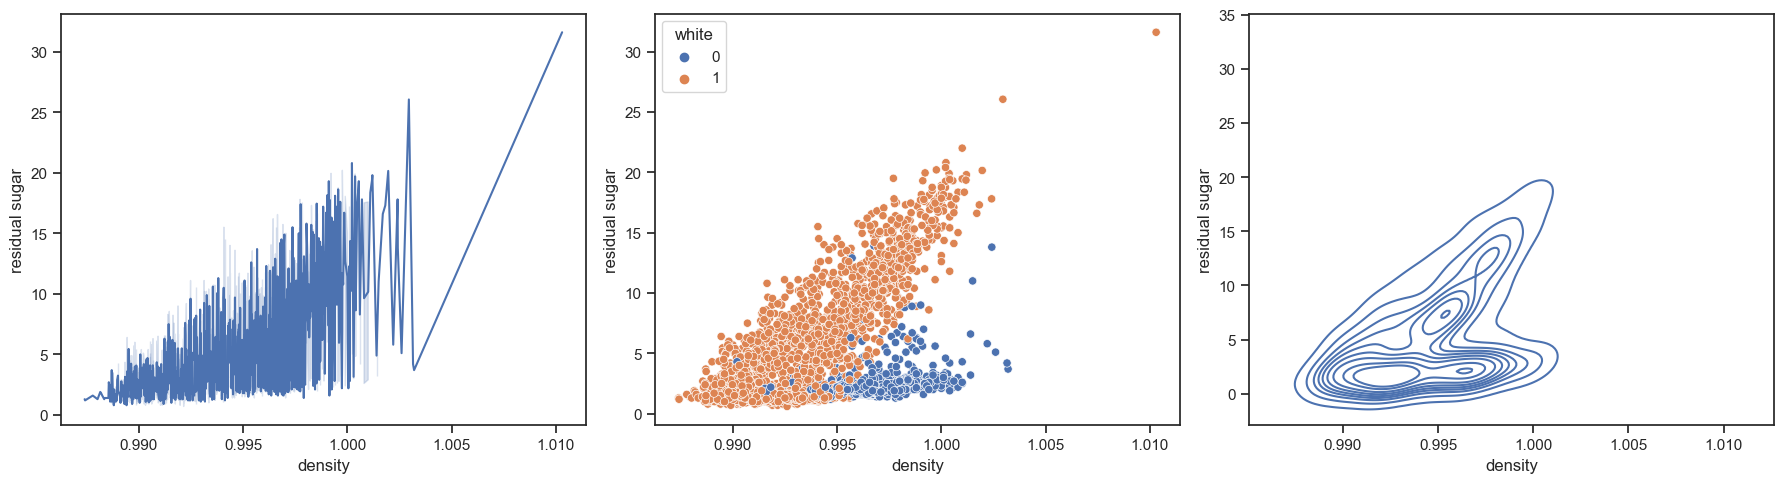

In [93]:
# plot all the low category columns to see the distributions


print(f'density vs residual sugar')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= train, x='density' , y='residual sugar', ax= ax[0])
sns.scatterplot(data= train, x='density' , y='residual sugar', ax= ax[1], hue='white')
sns.kdeplot(data= train, x='density' , y='residual sugar', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

## Red wines

density vs residual sugar


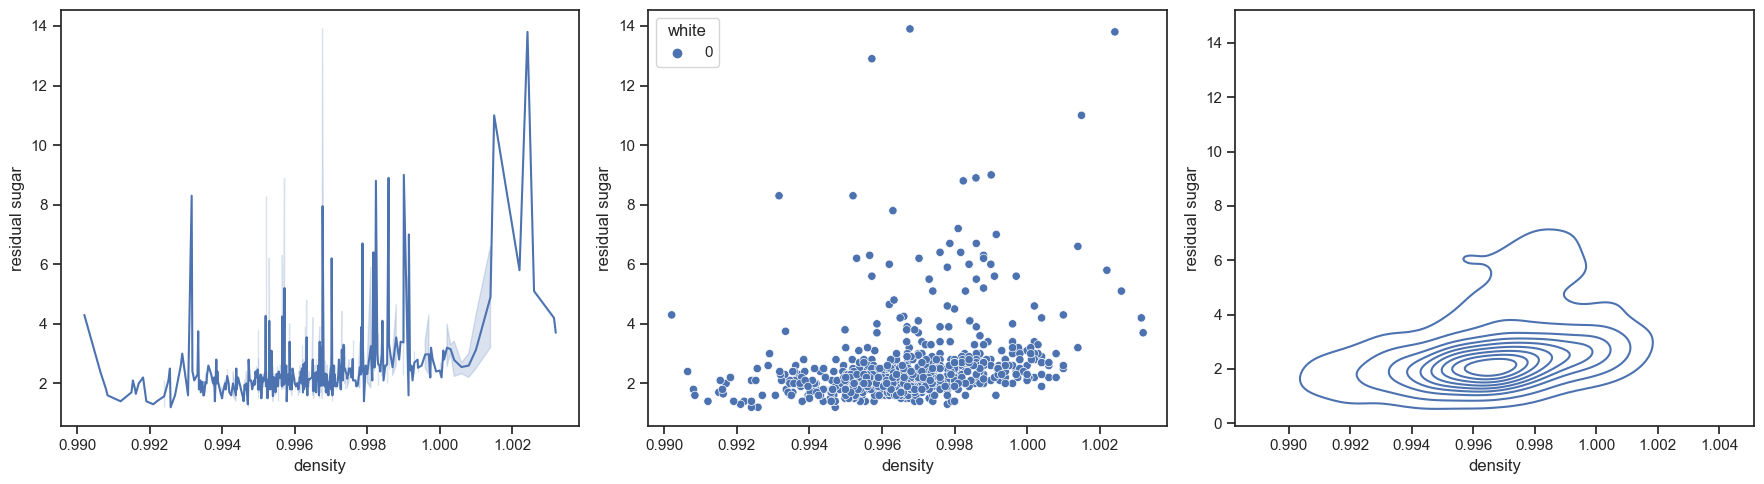

In [94]:
# plot all the low category columns to see the distributions


print(f'density vs residual sugar')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= red, x='density' , y='residual sugar', ax= ax[0])
sns.scatterplot(data= red, x='density' , y='residual sugar', ax= ax[1], hue='white')
sns.kdeplot(data= red, x='density' , y='residual sugar', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

# White Wines

density vs residual sugar


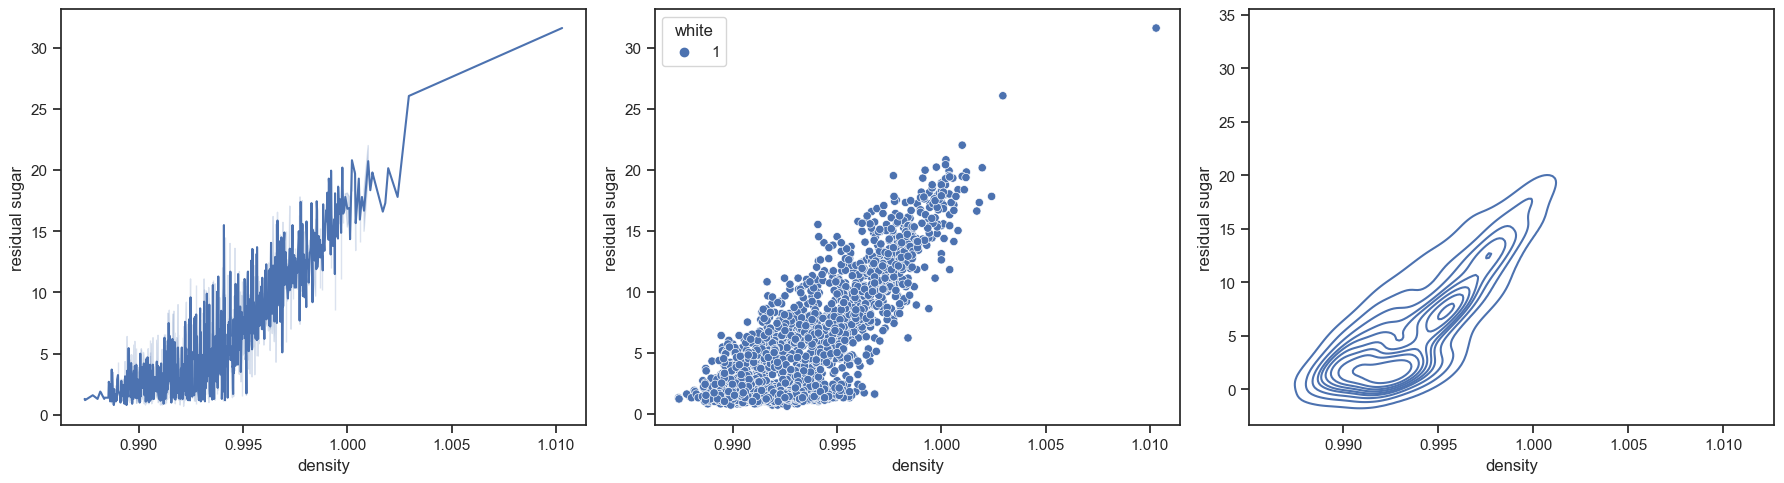

In [95]:
# plot all the low category columns to see the distributions


print(f'density vs residual sugar')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= white, x='density' , y='residual sugar', ax= ax[0])
sns.scatterplot(data= white, x='density' , y='residual sugar', ax= ax[1], hue='white')
sns.kdeplot(data= white, x='density' , y='residual sugar', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

## * How does density affect alcohol?

density vs alcohol


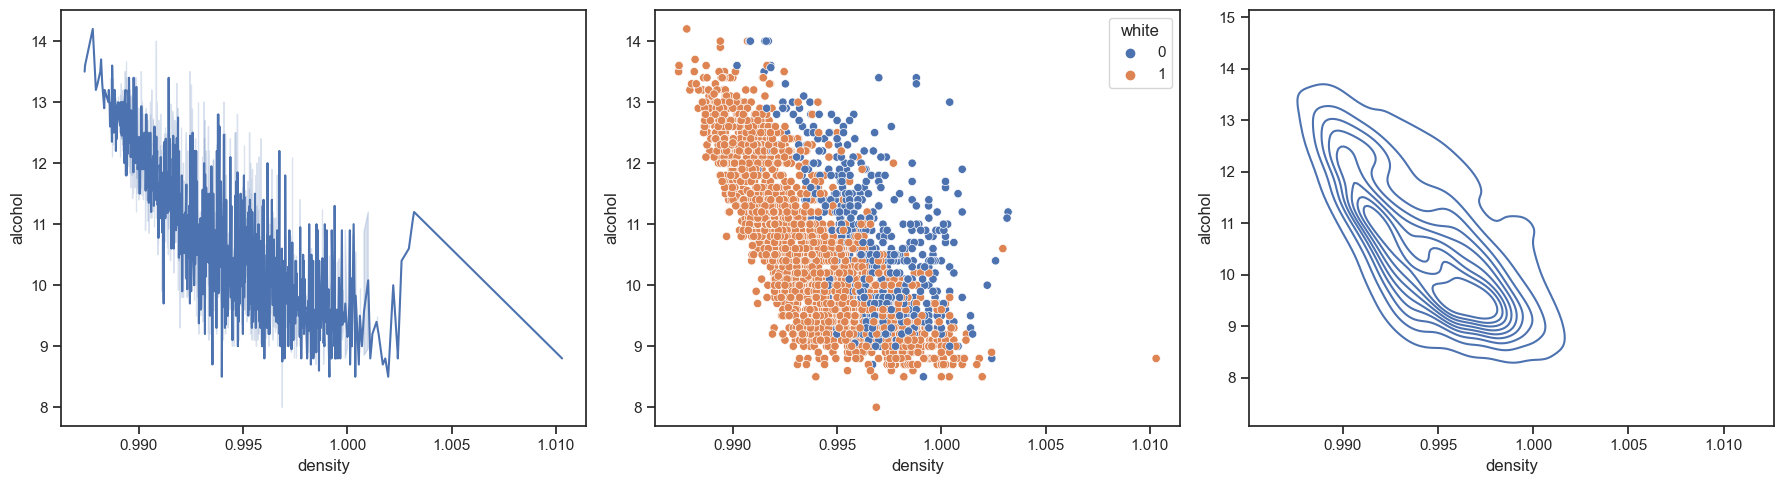

In [96]:
# plot all the low category columns to see the distributions


print(f'density vs alcohol')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= train, x='density' , y='alcohol', ax= ax[0])
sns.scatterplot(data= train, x='density' , y='alcohol', ax= ax[1], hue='white')
sns.kdeplot(data= train, x='density' , y='alcohol', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

# Red Wines


density vs alcohol


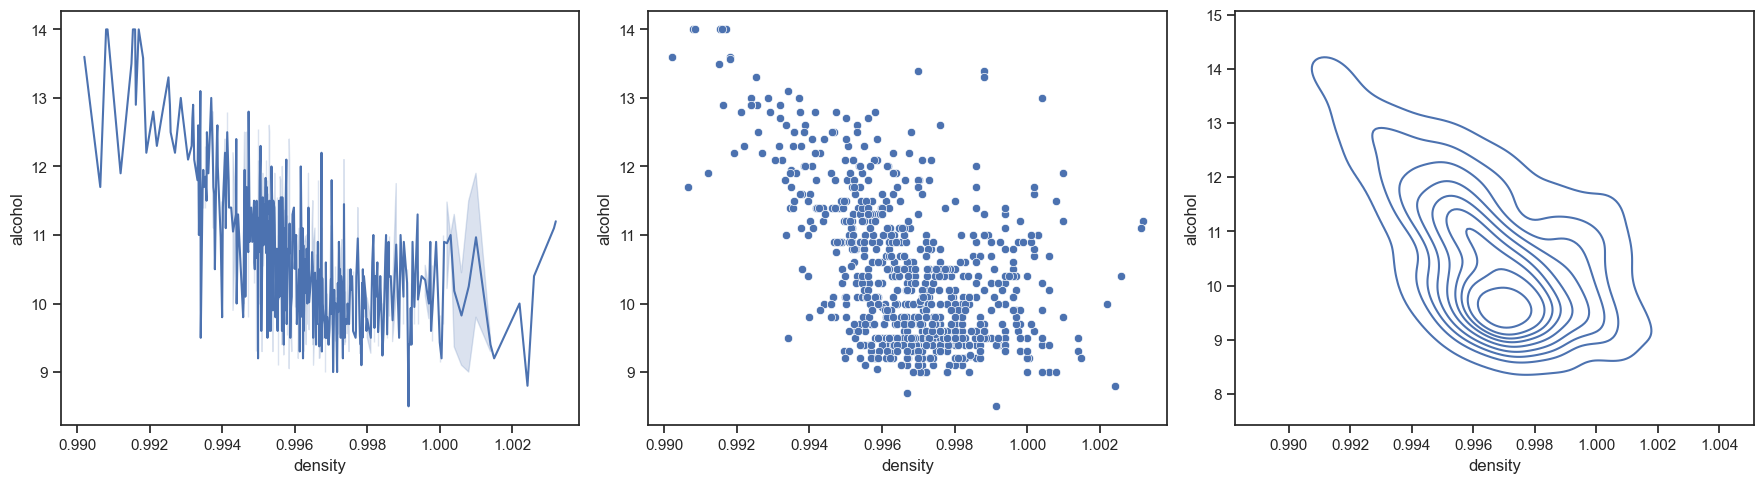

In [97]:
# plot all the low category columns to see the distributions


print(f'density vs alcohol')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= red, x='density' , y='alcohol', ax= ax[0])
sns.scatterplot(data= red, x='density' , y='alcohol', ax= ax[1])
sns.kdeplot(data= red, x='density' , y='alcohol', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

# White Wines


density vs alcohol


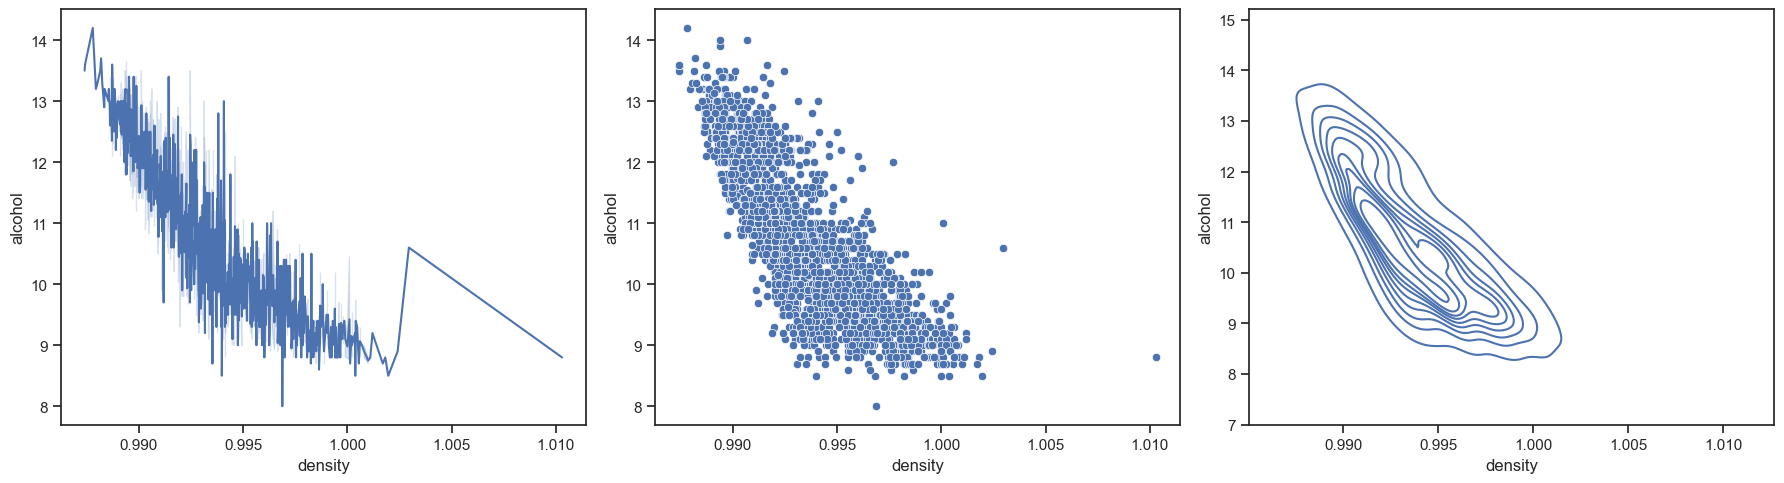

In [98]:
# plot all the low category columns to see the distributions


print(f'density vs alcohol')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= white, x='density' , y='alcohol', ax= ax[0])
sns.scatterplot(data= white, x='density' , y='alcohol', ax= ax[1])
sns.kdeplot(data= white, x='density' , y='alcohol', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

# Stats Testing

## Hypothesis:

H
0
: There is no linear correlation between density and alcohol.

H
a
: There is a linear relationship between density and alcohol.

## Pearson's R-test

In [99]:
corr, p = stats.pearsonr(x, y)
corr, p

NameError: name 'x' is not defined

## P-value less than alpha?

In [ ]:
p < α

### We can reject the null hypothesis.

## * Is the average pH higher in red or white wine?

## All wines

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
sns.barplot(data= train, x=train.white , y=train.pH, ax= ax[0])
sns.boxplot(data= train, x=train.white , y=train.pH, ax= ax[1])
sns.stripplot(data= train, x=train.white , y=train.pH, ax= ax[2])
plt.tight_layout()

## Red wines

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
sns.barplot(data= train, x=red.white , y=red.pH, ax= ax[0])
sns.boxplot(data= train, x=train.white , y=red.pH, ax= ax[1])
sns.stripplot(data= train, x=red.white , y=red.pH, ax= ax[2])
plt.tight_layout()

## White wines

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
sns.barplot(data= train, x=white.white , y=white.pH, ax= ax[0])
sns.boxplot(data= train, x=white.white , y=white.pH, ax= ax[1])
sns.stripplot(data= train, x=white.white , y=white.pH, ax= ax[2])
plt.tight_layout()

# Stats Testing
## Hypothesis:
H
0
: The average pH lelve in red and white wines is the same.

H
a
: The average pH in is higher in red wines.
## T-test

In [ ]:

t, p = stats.ttest_1samp(train.pH, train.white.mean())

print(t, p/2, alpha)


In [ ]:
bool((1/2 * p < α) and (t > 0))

### We can reject the null hypothesis.

## * How do chlorides affect density?

In [ ]:
# plot all the low category columns to see the distributions


print(f'density vs chlorides')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= train, x='density' , y='chlorides', ax= ax[0])
sns.scatterplot(data= train, x='density' , y='chlorides', ax= ax[1], hue='white')
sns.kdeplot(data= train, x='density' , y='chlorides', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

In [ ]:
chlorides_upper = train[train['chlorides']>.1]

In [ ]:
len(chlorides_upper)

In [ ]:
plot_variable_pairs(chlorides_upper)

In [ ]:
correlation_matrix = chlorides_upper.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = train.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = red.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Reds Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = white.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('White Correlation Heatmap')
plt.show()

In [ ]:
# Get a sample of the continious columns to fro ploting
sample = chlorides_upper[chlorides_upper.columns].sample(147)

# plot all the low category columns to see the distributions
for col in categorical_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.barplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.boxplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.stripplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    plt.tight_layout()
    
    # save visual to file path
    # explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()

In [ ]:
# plot all the low category columns to see the distributions

for col in continuous_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

    sns.barplot(data= chlorides_upper, x=col[0] , y=col[1], ax= ax[0])
    sns.scatterplot(data= chlorides_upper, x=col[0] , y=col[1], ax= ax[1])
    sns.kdeplot(data= chlorides_upper, x=col[0] , y=col[1], ax= ax[2])
    
    plt.tight_layout()
    
    # save visual to file path
    # explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()

In [ ]:
print(f'density vs chlorides')
# plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))   

# sns.lineplot(data= train, x='density' , y='chlorides', ax= ax[0])
sns.scatterplot(data=train, x='volatile acidity' , y='chlorides', ax= ax, hue='white')
# sns.kdeplot(data= train, x='density' , y='chlorides', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

In [ ]:
print(f'density vs chlorides')
# plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))   

sns.scatterplot(data=red, x='volatile acidity' , y='chlorides', ax= ax[0], hue='white')
ax[0].set_title('Red Wines')

sns.scatterplot(data=white, x='volatile acidity' , y='chlorides', ax= ax[1], hue='white')
ax[1].set_title('White Wines')
# sns.kdeplot(data= train, x='density' , y='chlorides', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

In [ ]:
from model import create_clusters

In [ ]:
create_clusters(X_train_scaled, X_validate_scaled, X_train)

In [111]:
score_less_than_5 = train[train['quality']<5]
score_less_than_5.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2191            8.2             0.260         0.44            1.30      0.046   
4518            4.8             0.650         0.12            1.10      0.013   
597             7.4             1.185         0.00            4.25      0.097   
1054            8.1             0.730         0.00            2.50      0.081   
703             6.9             0.390         0.24            2.10      0.102   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2191                  7.0                  69.0  0.99440  3.14       0.62   
4518                  4.0                  10.0  0.99246  3.32       0.36   
597                   5.0                  14.0  0.99660  3.63       0.54   
1054                 12.0                  24.0  0.99798  3.38       0.46   
703                   4.0                   7.0  0.99462  3.44       0.58   

      alcohol  quality  white  
2191     10.2        4      1  
4518     13.5        4      1  
597      10.7        3      0  
1054      9.6        4      0  
703      11.4        4      0

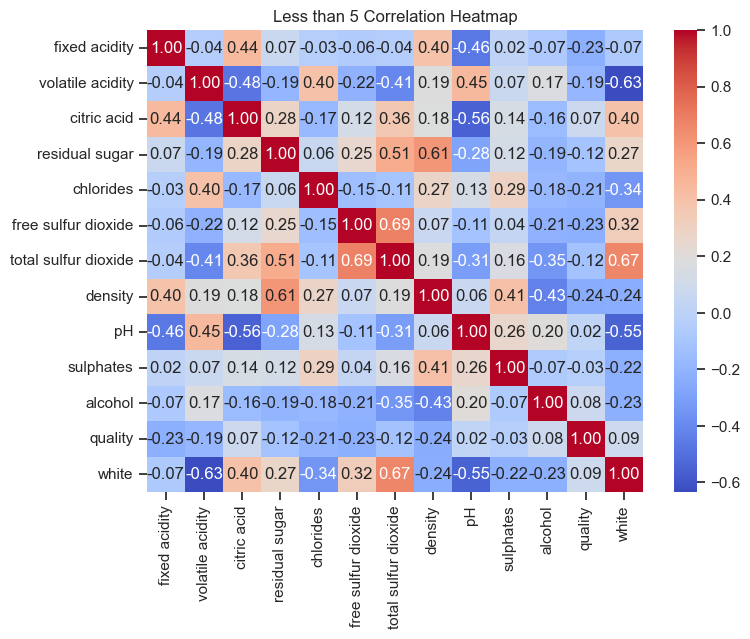

In [112]:
correlation_matrix = score_less_than_5.corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Less than 5 Correlation Heatmap')
plt.show()

density vs alcohol


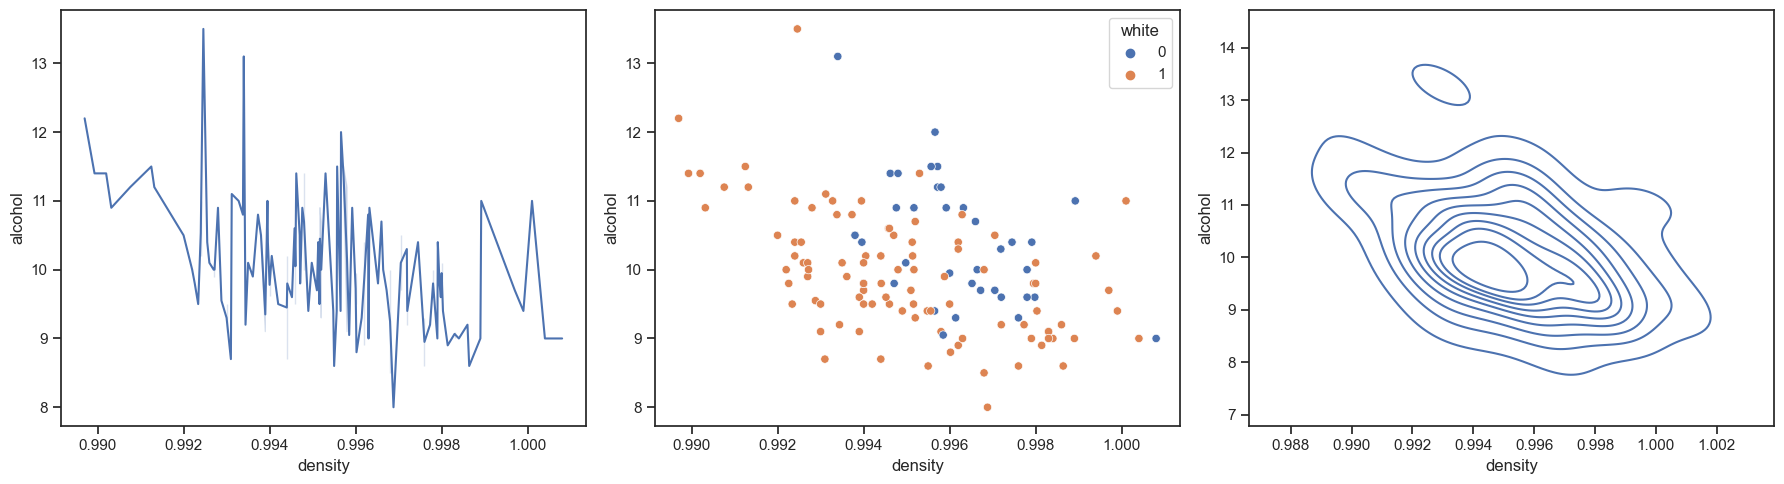

In [113]:
# plot all the low category columns to see the distributions


print(f'density vs alcohol')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= score_less_than_5, x='density' , y='alcohol', ax= ax[0])
sns.scatterplot(data= score_less_than_5, x='density' , y='alcohol', ax= ax[1], hue='white')
sns.kdeplot(data= score_less_than_5, x='density' , y='alcohol', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()

density vs chlorides


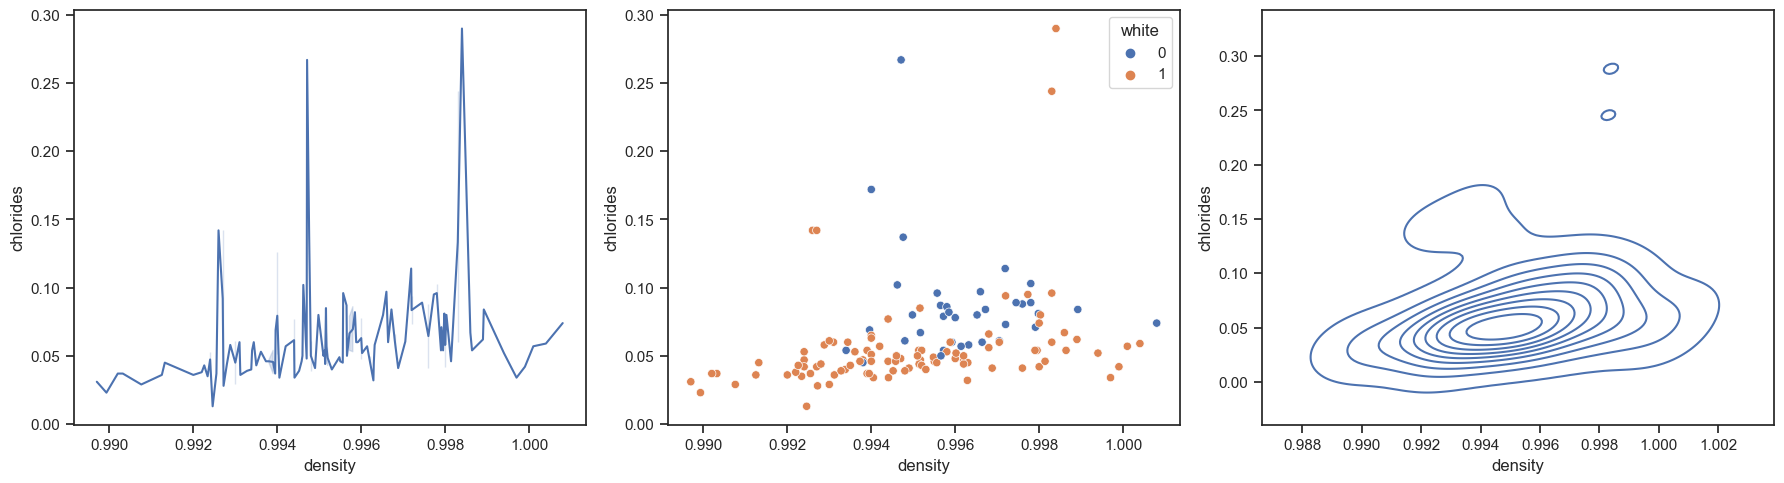

In [116]:


print(f'density vs chlorides')
# plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

sns.lineplot(data= score_less_than_5, x='density' , y='chlorides', ax= ax[0])
sns.scatterplot(data= score_less_than_5, x='density' , y='chlorides', ax= ax[1], hue='white')
sns.kdeplot(data= score_less_than_5, x='density' , y='chlorides', ax= ax[2])

plt.tight_layout()

# save visual to file path
# explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)

plt.show()